In [1]:
#import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#imoprt data
data = pd.read_csv('Churn_Modelling.csv')

#check for missing values
data.head(10)
data.info()
data.isna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      False    False          False      False           False   
1      False    False          False      False           False   
2      False    False          False      False           False   
3      False    False          False      False           False   
4      False    False          False      False           False   
...      ...      ...            ...        ...             ...   
9995   False    False          False      False           False   
9996   False    False          False      False           False   
9997   False    False          False      False           False   
9998   False    False          False      False           False   
9999   False    False          False      False           False   

      EstimatedSalary  Exited  
0               False   False  
1               False   False  
2               False   False  
3               False   False  
4               False   False  
...               ...     ...  
9995            False   False  
9996            False   False  
9997            False   False  
9998            False   False  
9999            False   False  

[10000 rows x 14 columns]

In [411]:
data.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [2]:
#convert categorical data
OneHotGeo = pd.get_dummies(data['Geography'])

for i in range(len(OneHotGeo.columns)):
    data.insert(i+4, list(OneHotGeo)[i], OneHotGeo.iloc[:, i])
    
OneHotGender = pd.get_dummies(data['Gender'])
for i in range(len(OneHotGender.columns)):
    data.insert(i+7, list(OneHotGender)[i], OneHotGender.iloc[:, i])

data = data.drop(['Geography', 'Gender'], axis=1)

#drop customer ID and surname
data = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1)


In [6]:
#check head and tail
data.head()
data.tail()

CreditScore  France  Germany  Spain  Female  Male  Age  Tenure  \
9995          771       1        0      0       0     1   39       5   
9996          516       1        0      0       0     1   35      10   
9997          709       1        0      0       1     0   36       7   
9998          772       0        1      0       0     1   42       3   
9999          792       1        0      0       1     0   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
9995       0.00              2          1               0         96270.64   
9996   57369.61              1          1               1        101699.77   
9997       0.00              1          0               1         42085.58   
9998   75075.31              2          1               0         92888.52   
9999  130142.79              1          1               0         38190.78   

      Exited  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0

In [7]:
data.describe()

CreditScore        France       Germany         Spain        Female  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     650.528800      0.501400      0.250900      0.247700      0.454300   
std       96.653299      0.500023      0.433553      0.431698      0.497932   
min      350.000000      0.000000      0.000000      0.000000      0.000000   
25%      584.000000      0.000000      0.000000      0.000000      0.000000   
50%      652.000000      1.000000      0.000000      0.000000      0.000000   
75%      718.000000      1.000000      1.000000      0.000000      1.000000   
max      850.000000      1.000000      1.000000      1.000000      1.000000   

               Male           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean       0.545700     38.921800      5.012800   76485.889288       1.530200   
std        0.497932     10.487806      2.892174   62397.405202       0.581654   
min        0.000000     18.000000      0.000000       0.000000       1.000000   
25%        0.000000     32.000000      3.000000       0.000000       1.000000   
50%        1.000000     37.000000      5.000000   97198.540000       1.000000   
75%        1.000000     44.000000      7.000000  127644.240000       2.000000   
max        1.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

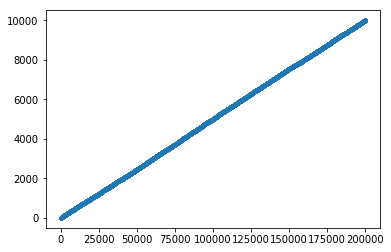

In [422]:
#ecdf
_ = plt.plot(np.sort(data.EstimatedSalary), np.arange(1, len(data.EstimatedSalary)+1), marker='.', linestyle='none')

In [49]:
#sns.pairplot(data, hue='Exited')

In [ ]:
#dist
sns.distplot(data.CreditScore)
sns.distplot(data.Age)
sns.distplot(data.Tenure)
sns.distplot(data.Balance)
sns.distplot(data.NumOfProducts)
sns.distplot(data.EstimatedSalary)

In [66]:
#correlations
corr = data.corr()

CreditScore    France   Germany     Spain    Female  \
CreditScore         1.000000 -0.008928  0.005538  0.004780  0.002857   
France             -0.008928  1.000000 -0.580359 -0.575418 -0.006772   
Germany             0.005538 -0.580359  1.000000 -0.332084  0.024628   
Spain               0.004780 -0.575418 -0.332084  1.000000 -0.016889   
Female              0.002857 -0.006772  0.024628 -0.016889  1.000000   
Male               -0.002857  0.006772 -0.024628  0.016889 -1.000000   
Age                -0.003965 -0.039208  0.046897 -0.001685  0.027544   
Tenure              0.000842 -0.002848 -0.000567  0.003868 -0.014733   
Balance             0.006268 -0.231329  0.401110 -0.134892 -0.012087   
NumOfProducts       0.012238  0.001230 -0.010419  0.009039  0.021859   
HasCrCard          -0.005458  0.002467  0.010577 -0.013480 -0.005766   
IsActiveMember      0.025651  0.003317 -0.020486  0.016732 -0.022544   
EstimatedSalary    -0.001384 -0.003332  0.010297 -0.006482  0.008112   
Exited             -0.027094 -0.104955  0.173488 -0.052667  0.106512   

                     Male       Age    Tenure   Balance  NumOfProducts  \
CreditScore     -0.002857 -0.003965  0.000842  0.006268       0.012238   
France           0.006772 -0.039208 -0.002848 -0.231329       0.001230   
Germany         -0.024628  0.046897 -0.000567  0.401110      -0.010419   
Spain            0.016889 -0.001685  0.003868 -0.134892       0.009039   
Female          -1.000000  0.027544 -0.014733 -0.012087       0.021859   
Male             1.000000 -0.027544  0.014733  0.012087      -0.021859   
Age             -0.027544  1.000000 -0.009997  0.028308      -0.030680   
Tenure           0.014733 -0.009997  1.000000 -0.012254       0.013444   
Balance          0.012087  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts   -0.021859 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard        0.005766 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember   0.022544  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary -0.008112 -0.007201  0.007784  0.012797       0.014204   
Exited          -0.106512  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
France            0.002467        0.003317        -0.003332 -0.104955  
Germany           0.010577       -0.020486         0.010297  0.173488  
Spain            -0.013480        0.016732        -0.006482 -0.052667  
Female           -0.005766       -0.022544         0.008112  0.106512  
Male              0.005766        0.022544        -0.008112 -0.106512  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

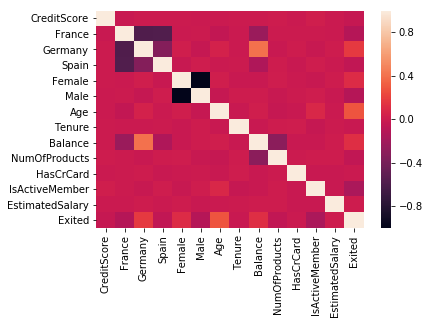

In [68]:
#correalation heatmap
sns.heatmap(corr)

0.513551621494595

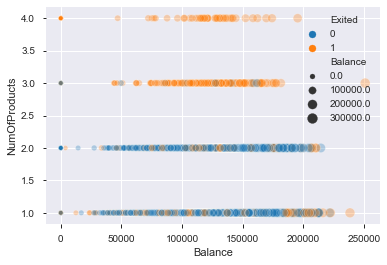

In [53]:
#balance/products and exited
#balance - number of products correlation -0.304180

#scatter plt
sns.scatterplot(x='Balance', y='NumOfProducts', hue='Exited', size='Balance', data=data, alpha=0.3)

#balance and exited
NoBalance = data.loc[data['Balance'] == 0]
NoBalance['Exited'].value_counts()
#3117, 500
HasBalance = data.loc[data['Balance'] != 0]
HasBalance['Exited'].value_counts()
#4846, 1537

NoBalance['Exited'].value_counts()[0]/NoBalance['Exited'].count()
HasBalance['Exited'].value_counts()[0]/HasBalance['Exited'].count()
##no balance has a higher rention rate(0.8617638927287807, 0.7592041359862134)

#correlations
HasBalance.corr()
#balance-exited 0.017208

#products and exited 
#customer with 3-4 products
MultiProducts = data.loc[data['NumOfProducts']>2]
#customer with 1-2 products
LessProducts = data.loc[data['NumOfProducts']<3]

#correlations
MultiProducts.corr()
#numofproducts-exited 0.192502
#balance-exited 0.345945
LessProducts.corr()
#numofproducts-exited -0.260762
#balance-exited 0.115281

MultiProducts['Exited'].value_counts()
#46, 280
LessProducts['Exited'].value_counts()
#7917, 1757

#retention rate
MultiProducts['Exited'].value_counts()[0]/MultiProducts['Exited'].count()
LessProducts['Exited'].value_counts()[0]/LessProducts['Exited'].count()
##customers who purchased 3-4 products tend to exit compared to those who purchased 1-2
##retention rates(0.1411042944785276, 0.8183791606367583)
##customers who purchased 3-4 products have balance positively related to exit decisions (0.345945)

#no balance
MultiProducts.loc[MultiProducts['Balance'] == 0]['Exited'].count()/MultiProducts['Exited'].count()
#112
#0.34355882
#8220858897
LessProducts.loc[LessProducts['Balance'] == 0]['Exited'].count()/LessProducts['Exited'].count()
#3505
#0.362311350010337
NoBalance['IsActiveMember'].value_counts()[1]/NoBalance['IsActiveMember'].count()
#1744, 1873
#0.5178324578379873
HasBalance['IsActiveMember'].value_counts()[1]/HasBalance['IsActiveMember'].count()
#3105, 3278
#0.513551621494595
##no balance does not seem to impact number of products or active status


array([ 69434.6965, 166780.4025])

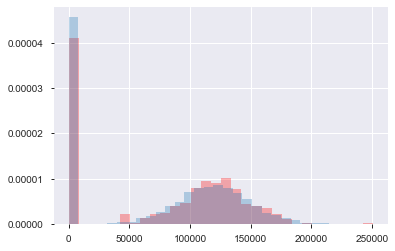

In [461]:
#products and balance
MultiBalance = MultiProducts['Balance']
LessBalance = LessProducts['Balance']
_ = plt.hist(MultiBalance, bins=30, alpha=0.3, color='red', normed=True)
_ = plt.hist(LessBalance, bins=30, alpha=0.3, normed=True)
MultiHasBalance = MultiProducts.loc[MultiProducts['Balance'] != 0]['Balance']
np.percentile(MultiHasBalance, [5, 95])

array([ 69413.414, 171443.558])

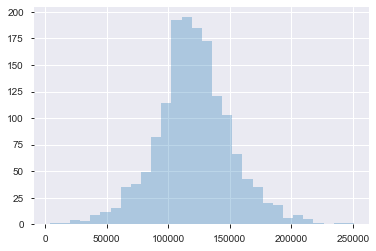

In [83]:
HasBalanceExited = HasBalance.loc[HasBalance['Exited']==1]['Balance']
#NoBalanceExited = NoBalance.loc[NoBalance['Exited']==1]['Balance']
_ = plt.hist(HasBalanceExited, bins=30, alpha=0.3)
np.percentile(HasBalanceExited, [5, 95])
#customers with 3-4 products and has balance tend to have the same range as those exited that has balance

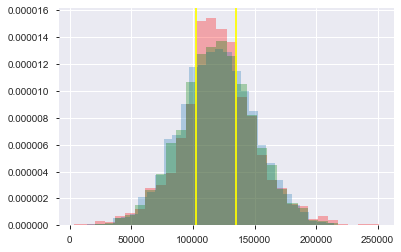

In [465]:
#customer with balance
HasBalanceExited = HasBalance.loc[HasBalance['Exited']==1]['Balance']
HasBalanceStayed = HasBalance.loc[HasBalance['Exited']==0]['Balance']
_ = plt.hist(HasBalanceExited, bins=30, alpha=0.3, color='red', normed=True)
_ = plt.hist(HasBalanceStayed, bins=30, alpha=0.3, normed=True)
_ = plt.hist(HasBalance['Balance'], bins=30, alpha=0.3, color='green', normed=True)


#_ = plt.axvline(np.percentile(HasBalanceExited, [5, 95])[0], color='red')
#_ = plt.axvline(np.percentile(HasBalanceExited, [5, 95])[1], color='red')
#_ = plt.axvline(np.percentile(HasBalanceStayed, [5, 95])[0], color='blue')
#_ = plt.axvline(np.percentile(HasBalanceStayed, [5, 95])[1], color='blue')

#_ = plt.axvline(np.percentile(HasBalance['Balance'], [5, 95])[0], color='green')
#_ = plt.axvline(np.percentile(HasBalance['Balance'], [5, 95])[1], color='green')

_ = plt.axvline(102500, color='yellow')
_ = plt.axvline(135000, color='yellow')


In [78]:
#age/active and exited
#age - exited 0.285323

#plot
#sns.scatterplot(x='Age', y='IsActiveMember', data=data, hue='Exited', size='Balance', alpha=0.2)
#sns.distplot(IsActive.loc[IsActive['Exited'] == 1]['Age'], bins=40)
#sns.distplot(NotActive.loc[NotActive['Exited'] == 1]['Age'], bins=40)

#by active
IsActive = data.loc[data['IsActiveMember'] == 1]
NotActive = data.loc[data['IsActiveMember'] == 0]

#correlations
IsActive.corr()
#age - exited 0.173498
NotActive.corr()
#age - exited 0.466271

IsActive['Exited'].value_counts()
#4416, 735
NotActive['Exited'].value_counts()
#3547, 1302
IsActive['Exited'].count()
#5151
NotActive['Exited'].count()
#4849
##active members have higher retention rate (0.8573092603377985, 0.7314910290781604)
##51.51% of the members are active

#before 45
IsActive.loc[IsActive['Age'] <= 45]['Exited'].value_counts()
#3527, 389
NotActive.loc[NotActive['Age'] <= 45]['Exited'].value_counts()
#3282, 691

#retention rate
IsActive.loc[IsActive['Age'] <= 45]['Exited'].value_counts()[0]/IsActive.loc[IsActive['Age'] <= 45]['Exited'].count()
NotActive.loc[NotActive['Age'] <= 45]['Exited'].value_counts()[0]/NotActive.loc[NotActive['Age'] <= 45]['Exited'].count()
##before 45 active members have higher rentention rate (0.9006639427987743, 0.8263277120563806)

#after 45
IsActive.loc[IsActive['Age'] > 45]['Exited'].value_counts()
#889, 346
NotActive.loc[NotActive['Age'] > 45]['Exited'].value_counts()
#265, 611

#retention rate
IsActive.loc[IsActive['Age'] > 45]['Exited'].value_counts()[0]/IsActive.loc[IsActive['Age'] > 45]['Exited'].count()
NotActive.loc[NotActive['Age'] > 45]['Exited'].value_counts()[0]/NotActive.loc[NotActive['Age'] > 45]['Exited'].count()
##after 45 not active members have very low retention rate (0.719838056680162, 0.3025114155251142)


0.3025114155251142

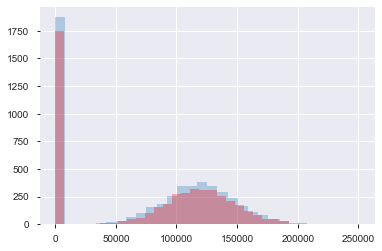

In [460]:
#active status and balance
ActiveBalance = IsActive['Balance']
NoActiveBalance = NotActive['Balance']
_ = plt.hist(ActiveBalance, bins=30, alpha=0.3)
_ = plt.hist(NoActiveBalance, bins=30, alpha=0.3, color='red')


1    0.694792
0    0.305208
Name: HasCrCard, dtype: float64

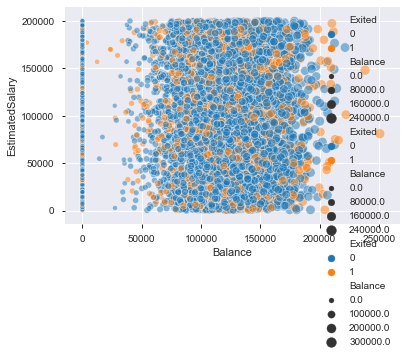

In [56]:
#country and balance/products/credit card
#fr, gr, sp - balance correalations -0.231329, 0.401110, -0.134892

#by country
France = data.loc[data['France'] == 1]
Germany = data.loc[data['Germany'] == 1]
Spain = data.loc[data['Spain'] == 1]

#scatter plots
sns.scatterplot(x='Balance', y='EstimatedSalary', data=France, size='Balance', hue='Exited', alpha=0.5)
sns.scatterplot(x='Balance', y='EstimatedSalary', data=Germany, size='Balance', hue='Exited',alpha=0.5)
sns.scatterplot(x='Balance', y='EstimatedSalary', data=Spain, size='Balance', hue='Exited', alpha=0.5)

#for each country:
#retention rate
France['Exited'].value_counts()
#4204, 810
Germany['Exited'].value_counts()
#1695, 814
Spain['Exited'].value_counts()
#2064, 413

#retention rate
France['Exited'].value_counts()[0]/France['Exited'].count()
Germany['Exited'].value_counts()[0]/Germany['Exited'].count()
Spain['Exited'].value_counts()[0]/Spain['Exited'].count()
##Germany has a lower retention rate(0.8384523334662943, 0.6755679553607015, 0.8332660476382721)
##salary structures are similiar and don't seem to affect balance

#no balance
FRNoBalance = France.loc[data['Balance'] == 0]
GRNoBalance = Germany.loc[data['Balance'] == 0]
SPNoBalance = Spain.loc[data['Balance'] == 0]

#no balance rate
FRNoBalance.France.count()/France.France.count()
#2418/5014
GRNoBalance.Germany.count()/Germany.Germany.count()
#0/2509
SPNoBalance.Spain.count()/Spain.Spain.count()
#1199/2477
##Germany has extremely low no balance rate(0.48224970083765456, 0.0, 0.4840532902704885)

#balance median
France['Balance'].median()
#62153.5
Germany['Balance'].median()
#119703.1
Spain['Balance'].median()
#61710.44
##Germany tends to have more balance

#products
France['NumOfProducts'].value_counts()
#(2514, 2367, 104, 29)/5014
France['NumOfProducts'].value_counts()/France['NumOfProducts'].count()
#(0.501396090945353, 0.47207818109293975, 0.020741922616673316, 0.0057838053450339055)
Germany['NumOfProducts'].value_counts()
#(1349, 1040, 96, 24)/2509
Germany['NumOfProducts'].value_counts()/Germany['NumOfProducts'].count()
#(0.5376644081307294, 0.41450777202072536, 0.038262255878836186, 0.009565563969709047)
Spain['NumOfProducts'].value_counts()
#(1221, 1183, 66, 7)/2477
Spain['NumOfProducts'].value_counts()/Spain['NumOfProducts'].count()
#(0.4929350020185709, 0.4775938635446104, 0.026645135244247074, 0.002825999192571659)
##similiar product purchasing structures

#credit card
France['HasCrCard'].value_counts()
#(1471, 3543)/5014
France['HasCrCard'].value_counts()/France['HasCrCard'].count()
#(0.29337854008775427, 0.7066214599122457)
Germany['HasCrCard'].value_counts()
#(718, 1791)/2509
Germany['HasCrCard'].value_counts()/Germany['HasCrCard'].count()
#(0.28616978876046234, 0.7138302112395377)
Spain['HasCrCard'].value_counts()
#(756, 1721)/2477
Spain['HasCrCard'].value_counts()/Spain['HasCrCard'].count()
#(0.3052079127977392, 0.6947920872022608)
##similiar credit card holding rates

0.6078066914498141

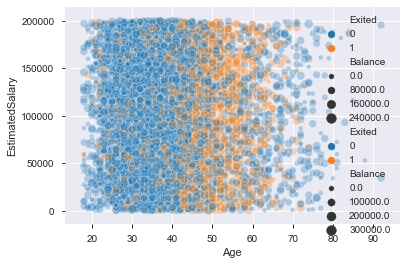

In [114]:
#gender
#female, male - exited correaltion 0.106512, -0.106512

#by gender
Female = data.loc[data['Female'] == 1]
Male = data.loc[data['Male'] == 1]

#plots
sns.scatterplot(x='Age', y='EstimatedSalary', data=Female, hue='Exited', size='Balance', alpha=0.3)
sns.scatterplot(x='Age', y='EstimatedSalary', data=Male, hue='Exited', size='Balance', alpha=0.3)

#retention rate
Female['Exited'].value_counts()
#3404, 1139
Male['Exited'].value_counts()
#4559, 898

Female['Exited'].value_counts()[0]/Female['Exited'].count()
Male['Exited'].value_counts()[0]/Male['Exited'].count()
##Male has higher retention rate (0.7492846136913933, 0.8354407183434122)

#age > 45 group
Female.loc[Female['Age'] > 45]['Age'].count()/Female['Age'].count()
#0.22782302443319394
Male.loc[Male['Age'] > 45]['Age'].count()/Male['Age'].count()
#0.19717793659519883
Male.loc[Male['Age'] > 45]['IsActiveMember'].value_counts()[1]/Male.loc[Male['Age'] > 45]['IsActiveMember'].count()
#0.6143122676579925
Female.loc[Female['Age'] > 45]['IsActiveMember'].value_counts()[1]/Female.loc[Female['Age'] > 45]['IsActiveMember'].count()
#0.5545893719806764
##Female has larger age > 45 portion and lower active rate for age > 45

#retention rate
Female.loc[Female['Age'] > 45]['Exited'].value_counts()
#500, 535
Male.loc[Male['Age'] > 45]['Exited'].value_counts()
#654, 422

Female.loc[Female['Age'] > 45]['Exited'].value_counts()[0]/Female.loc[Female['Age'] > 45]['Exited'].count()
Male.loc[Male['Age'] > 45]['Exited'].value_counts()[0]/Male.loc[Male['Age'] > 45]['Exited'].count()
##for age > 45, female has lower retention rate (0.4830917874396135, 0.6078066914498141)



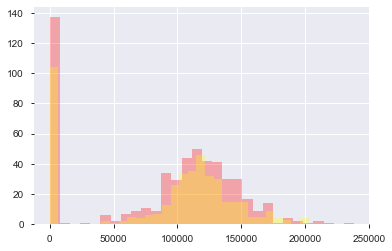

In [459]:
#age > 45 balance
Female45PlusBlance = Female.loc[Female['Age'] > 45]['Balance']
Male45PlusBlance = Male.loc[Male['Age'] > 45]['Balance']
#_ = plt.hist(Female45PlusBlance, bins=30, alpha=0.3, color='green')
#_ = plt.hist(Male45PlusBlance, bins=30, alpha=0.3, color='blue')
#female>45 has more around 900000-150000 balance

Female45PlusExitedBlance = Female.loc[Female['Age'] > 45].loc[Female['Exited']==1]['Balance']
Male45PlusExitedBlance = Male.loc[Male['Age'] > 45].loc[Male['Exited']==1]['Balance']
_ = plt.hist(Female45PlusExitedBlance, bins=30, alpha=0.3, color='red')
_ = plt.hist(Male45PlusExitedBlance, bins=30, alpha=0.3, color='yellow')

#exited females age >45 tend to have more balance than exited males age>45

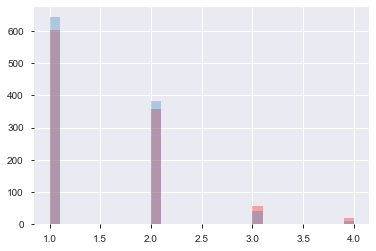

In [73]:
#age>45 products
Female45PlusProducts = Female.loc[Female['Age'] > 45]['NumOfProducts']
Male45PlusProducts = Male.loc[Male['Age'] > 45]['NumOfProducts']

_ = plt.hist(Female45PlusProducts, bins=30, alpha=0.3, color='red')
_ = plt.hist(Male45PlusProducts, bins=30, alpha=0.3)
#female age >45 slightly tend to buy more products

In [ ]:
#tenure groups
LongTerm =data.loc[data['Tenure'] > 7]
MidTerm = data.loc[data['Tenure'] > 3][data['Tenure'] <= 7]
ShortTerm = data.loc[data['Tenure'] <= 3]

LongTerm['Exited'].value_counts()[0]/LongTerm['Exited'].count()
MidTerm['Exited'].value_counts()/MidTerm['Exited'].count()
ShortTerm['Exited'].value_counts()/ShortTerm['Exited'].count()
##similiar rentention rate for different tenure groups(0.7955182072829131, 0.8035535535535535, 0.7885877318116976)


In [ ]:
#credit score/credit card/salary
#plots
sns.scatterplot(x='Balance', y='HasCrCard', hue='Exited', size='CreditScore', data=data, alpha=0.3)
sns.scatterplot(x='CreditScore', y='Balance', hue='HasCrCard', size='NumOfProducts', data=data, alpha=0.3)
sns.scatterplot(x='Balance', y='EstimatedSalary', hue='Exited', size='CreditScore', data=data, alpha=0.3)
##no significant trend

In [89]:
#report
import pandas_profiling
pandas_profiling.ProfileReport(data)

In [ ]:
#######

In [90]:
#Statistical Data Analysis

#questions:
#customers that have balance between a certain range tend to exit?
#no balance's effect/cause?
#not active & age>45, germany, products 3-4 tend to exit because of balance?

#variables:
#balance; exited; age, gender, active, geo

#significant diff in subgroups
#age>45 inactive female; germany; 3-4 products; 

#tests:
#bs pairs
#bs pairs
#perm pairs

In [39]:
import scipy.stats as stats
#import pymc3 as pm

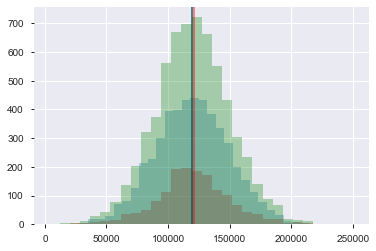

In [445]:
#customer with balance
HasBalanceExited = HasBalance.loc[HasBalance['Exited']==1]['Balance']
HasBalanceStayed = HasBalance.loc[HasBalance['Exited']==0]['Balance']
_ = plt.hist(HasBalanceExited, bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalanceStayed, bins=30, alpha=0.3)
_ = plt.hist(HasBalance['Balance'], bins=30, alpha=0.3, color='green')

#_ = plt.axvline(np.percentile(HasBalanceExited, [5, 95])[0], color='red')
#_ = plt.axvline(np.percentile(HasBalanceExited, [5, 95])[1], color='red')
#_ = plt.axvline(np.percentile(HasBalanceStayed, [5, 95])[0], color='blue')
#_ = plt.axvline(np.percentile(HasBalanceStayed, [5, 95])[1], color='blue')
#_ = plt.axvline(np.percentile(HasBalance['Balance'], [5, 95])[0], color='green')
#_ = plt.axvline(np.percentile(HasBalance['Balance'], [5, 95])[1], color='green')

_ = plt.axvline(np.mean(HasBalanceExited), color='red', alpha=0.5)
_ = plt.axvline(np.mean(HasBalanceStayed), color='blue', alpha=0.5)
_ = plt.axvline(np.mean(HasBalance['Balance']), color='green', alpha=0.5)

#non zero balance, stayed customers' non zero balance and exited customers' non zero balance seem to have similiar distributions

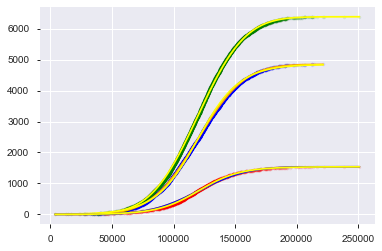

In [214]:
#ecdf
_ = plt.plot(np.sort(HasBalanceExited), np.arange(1, len(HasBalanceExited)+1), color='red', marker='.', linestyle='none', alpha=0.1)
_ = plt.plot(np.sort(HasBalanceStayed), np.arange(1, len(HasBalanceStayed)+1), color='blue', marker='.', linestyle='none', alpha=0.1)
_ = plt.plot(np.sort(HasBalance['Balance']), np.arange(1, len(HasBalance['Balance'])+1), color='green', marker='.', linestyle='none', alpha=0.1)

#theoretical cdf
HasBalanceNormLc, HasBalanceNormSc = stats.norm.fit(HasBalance['Balance'])
HasBalanceStayedNormLc, HasBalanceStayedNormSc = stats.norm.fit(HasBalanceStayed)
HasBalanceStayedLogLc, HasBalanceStayedLogSc = stats.logistic.fit(HasBalanceStayed)
HasBalanceExitedNormLc, HasBalanceExitedNormSc = stats.norm.fit(HasBalanceExited)
HasBalanceExitedTDf, HasBalanceExitedTLc, HasBalanceExitedTSc = stats.t.fit(HasBalanceExited)
HasBalanceExitedLogLc, HasBalanceExitedLogSc = stats.logistic.fit(HasBalanceExited)

_ = plt.plot(np.sort(HasBalance['Balance']), stats.norm.cdf(np.sort(HasBalance['Balance']), HasBalanceNormLc, HasBalanceNormSc)*(len(HasBalance['Balance'])+1), color='yellow')
_ = plt.plot(np.sort(HasBalanceStayed), stats.norm.cdf(np.sort(HasBalanceStayed), HasBalanceStayedNormLc, HasBalanceStayedNormSc)*(len(HasBalanceStayed)+1), color='orange')
_ = plt.plot(np.sort(HasBalanceStayed), stats.logistic.cdf(np.sort(HasBalanceStayed), HasBalanceStayedLogLc, HasBalanceStayedLogSc)*(len(HasBalanceStayed)+1), color='yellow')
_ = plt.plot(np.sort(HasBalanceExited), stats.norm.cdf(np.sort(HasBalanceExited), HasBalanceExitedNormLc, HasBalanceExitedNormSc)*(len(HasBalanceExited)+1), color='orange')
_ = plt.plot(np.sort(HasBalanceExited), stats.t.cdf(np.sort(HasBalanceExited), HasBalanceExitedTDf, HasBalanceExitedTLc, HasBalanceExitedTSc)*(len(HasBalanceExited)+1), color='blue')
_ = plt.plot(np.sort(HasBalanceExited), stats.logistic.cdf(np.sort(HasBalanceExited), HasBalanceExitedLogLc, HasBalanceExitedLogSc)*(len(HasBalanceExited)+1), color='yellow')

#HasBalance and HasBalanceStayed are normal dist, HasBalanceExited is logistic dist
#ecdfs overlay well with thereoretical cdfs

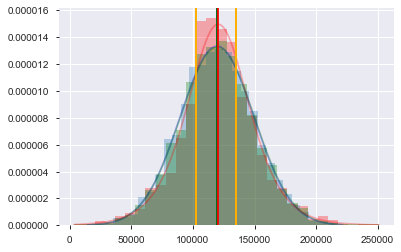

In [291]:
_ = plt.hist(HasBalanceExited, bins=30, alpha=0.3, color='red', normed=True)
_ = plt.hist(HasBalanceStayed, bins=30, alpha=0.3, normed=True)
_ = plt.hist(HasBalance['Balance'], bins=30, alpha=0.3, color='green', normed=True)

#_ = plt.axvline(np.percentile(HasBalanceExited, [5, 95])[0], color='red')
#_ = plt.axvline(np.percentile(HasBalanceExited, [5, 95])[1], color='red')
#_ = plt.axvline(np.percentile(HasBalanceStayed, [5, 95])[0], color='blue')
#_ = plt.axvline(np.percentile(HasBalanceStayed, [5, 95])[1], color='blue')
#_ = plt.axvline(np.percentile(HasBalance['Balance'], [5, 95])[0], color='green')
#_ = plt.axvline(np.percentile(HasBalance['Balance'], [5, 95])[1], color='green')

#_ = plt.axvline(np.mean(HasBalanceExited), color='red', alpha=0.5)
#_ = plt.axvline(np.mean(HasBalanceStayed), color='blue', alpha=0.5)
#_ = plt.axvline(np.mean(HasBalance['Balance']), color='green', alpha=0.5)

_ = plt.plot(np.sort(HasBalanceStayed), stats.norm.pdf(np.sort(HasBalanceStayed), HasBalanceStayedNormLc, HasBalanceStayedNormSc), color='blue', alpha=0.3)
_ = plt.plot(np.sort(HasBalanceExited), stats.logistic.pdf(np.sort(HasBalanceExited), HasBalanceExitedLogLc, HasBalanceExitedLogSc), color='red', alpha=0.3)
_ = plt.plot(np.sort(HasBalance['Balance']), stats.norm.pdf(np.sort(HasBalance['Balance']), HasBalanceNormLc, HasBalanceNormSc), color='green', alpha=0.3)

_ = plt.axvline(HasBalanceStayedNormLc, color='blue')
_ = plt.axvline(HasBalanceNormLc, color='green')
_ = plt.axvline(HasBalanceExitedLogLc, color='red')

_ = plt.axvline(102500, color='yellow')
_ = plt.axvline(135000, color='yellow')

_ = plt.axvline(stats.logistic.ppf(0.25, HasBalanceExitedLogLc, HasBalanceExitedLogSc), color='orange')
_ = plt.axvline(stats.logistic.ppf(0.70, HasBalanceExitedLogLc, HasBalanceExitedLogSc), color='orange')



#customers with balance between 102500 - 135000 /[25, 70] tend to leave more
#pdfs overlay well

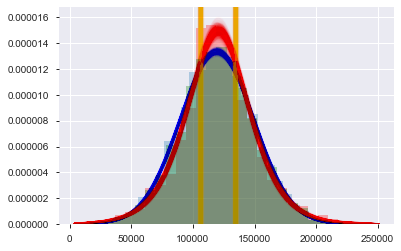

In [380]:
#ci for distribution parameters

_ = plt.hist(HasBalanceExited, bins=30, alpha=0.3, color='red', normed=True)
_ = plt.hist(HasBalanceStayed, bins=30, alpha=0.3, normed=True)
_ = plt.hist(HasBalance['Balance'], bins=30, alpha=0.3, color='green', normed=True)

_ = plt.plot(np.sort(HasBalanceStayed), stats.norm.pdf(np.sort(HasBalanceStayed), HasBalanceStayedNormLc, HasBalanceStayedNormSc), color='blue', alpha=0.3)
_ = plt.plot(np.sort(HasBalanceExited), stats.logistic.pdf(np.sort(HasBalanceExited), HasBalanceExitedLogLc, HasBalanceExitedLogSc), color='red', alpha=0.3)
_ = plt.plot(np.sort(HasBalance['Balance']), stats.norm.pdf(np.sort(HasBalance['Balance']), HasBalanceNormLc, HasBalanceNormSc), color='green', alpha=0.3)

n = 1000

for i in range(n):
    HasBalanceStayedBS = np.random.choice(HasBalanceStayed, len(HasBalanceStayed))
    HasBalanceStayedBSLc, HasBalanceStayedBSSc = stats.norm.fit(HasBalanceStayedBS)
    _ = plt.plot(np.sort(HasBalanceStayedBS), stats.norm.pdf(np.sort(HasBalanceStayedBS), HasBalanceStayedBSLc, HasBalanceStayedBSSc), color='blue', alpha=0.01)

for i in range(n):
    HasBalanceExitedBS = np.random.choice(HasBalanceExited, len(HasBalanceExited))
    HasBalanceExitedBSLc, HasBalanceExitedBSSc = stats.logistic.fit(HasBalanceExitedBS)
    _ = plt.plot(np.sort(HasBalanceExitedBS), stats.logistic.pdf(np.sort(HasBalanceExitedBS), HasBalanceExitedBSLc, HasBalanceExitedBSSc), color='red', alpha=0.01)
    _ = plt.axvline(stats.logistic.ppf(0.30, HasBalanceExitedBSLc, HasBalanceExitedBSSc), color='orange', alpha=0.01)
    _ = plt.axvline(stats.logistic.ppf(0.70, HasBalanceExitedBSLc, HasBalanceExitedBSSc), color='orange', alpha=0.01)
    
#from simulation can tell [30, 70] tend to leave more

In [446]:
#95% confidence intervels
#define bootstrap function

def bs_rep(data, func, size):
    rep = np.empty(size)
    for i in range(size):
        bs = np.random.choice(data, len(data))
        rep[i] = func(bs)
    return rep

n = 10000
HasBalanceExitedMeanCI = np.percentile(bs_rep(HasBalanceExited, np.mean, n), [2.5, 97.5])
HasBalanceExitedStdCI = np.percentile(bs_rep(HasBalanceExited, np.std, n), [2.5, 97.5])
HasBalanceStayedMeanCI = np.percentile(bs_rep(HasBalanceStayed, np.mean, n), [2.5, 97.5])
HasBalanceStayedStdCI = np.percentile(bs_rep(HasBalanceStayed, np.std, n), [2.5, 97.5])
HasBalanceExitedMeanCI, HasBalanceExitedStdCI, HasBalanceStayedMeanCI, HasBalanceStayedStdCI
#(array([119204.61233393, 122283.12203969]),
#array([29248.69979372, 31874.10350709]),
#array([118684.88234797, 120385.14285602]),
#array([29364.8433063 , 30524.31485055]))

(array([119204.61233393, 122283.12203969]),
 array([29248.69979372, 31874.10350709]),
 array([118684.88234797, 120385.14285602]),
 array([29364.8433063 , 30524.31485055]))

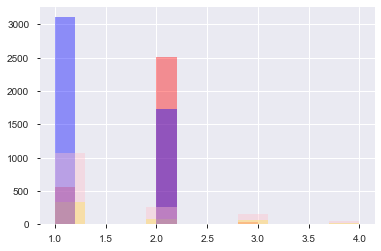

In [328]:
#no balance's effect on products 
#balance-exited hist
NoBalanceStayedProducts = NoBalance.loc[NoBalance['Exited']==0]['NumOfProducts']
NoBalanceExitedProducts = NoBalance.loc[NoBalance['Exited']==1]['NumOfProducts']
HasBalanceExitedProducts = HasBalance.loc[HasBalance['Exited']==1]['NumOfProducts']
HasBalanceStayedProducts = HasBalance.loc[HasBalance['Exited']==0]['NumOfProducts']
_ = plt.hist(NoBalanceStayedProducts, alpha=0.4, color='red')
_ = plt.hist(NoBalanceExitedProducts, alpha=0.4, color='yellow')
_ = plt.hist(HasBalanceStayedProducts, alpha=0.4, color='blue')
_ = plt.hist(HasBalanceExitedProducts, alpha=0.4, color='pink')
#stayed customers tend to buy only 1-2 products(no balance stayed tend to buy 2)
#other than no balance stayed customers, most customers tend to buy less products

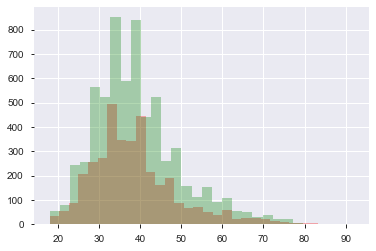

In [125]:
#no balance
NoBalance = data.loc[data['Balance'] == 0]
HasBalance = data.loc[data['Balance'] != 0]
_ = plt.hist(NoBalance['Age'], bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalance['Age'], bins=30, alpha=0.3, color='green')

_ = plt.hist(NoBalance['CreditScore'], bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalance['CreditScore'], bins=30, alpha=0.3, color='green')

_ = plt.hist(NoBalance['NumOfProducts'], alpha=0.3, color='red')
_ = plt.hist(HasBalance['NumOfProducts'], alpha=0.3, color='green')
#no balance customers tend to buy 2 products

_ = plt.hist(NoBalance['Tenure'], bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalance['Tenure'], bins=30, alpha=0.3, color='green')

_ = plt.hist(NoBalance['EstimatedSalary'], bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalance['EstimatedSalary'], bins=30, alpha=0.3, color='green')

_ = plt.hist(NoBalance['HasCrCard'], bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalance['HasCrCard'], bins=30, alpha=0.3, color='green')

_ = plt.hist(NoBalance['IsActiveMember'], bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalance['IsActiveMember'], bins=30, alpha=0.3, color='green')

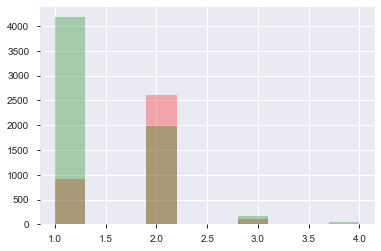

In [462]:
_ = plt.hist(NoBalance['NumOfProducts'], alpha=0.3, color='red')
_ = plt.hist(HasBalance['NumOfProducts'], alpha=0.3, color='green')
#no balance customers tend to buy 2 products

In [ ]:
##not active & age>45, germany, products 3-4 tend to exit?

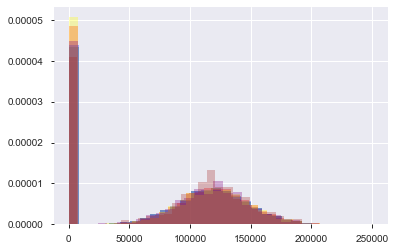

In [353]:
#not active tend to have more 0 balance
ActiveBalance = IsActive['Balance']
NoActiveBalance = NotActive['Balance']
Active45Less = IsActive.loc[IsActive['Age']<=45]['Balance']
NActive45Less = NotActive.loc[NotActive['Age']<=45]['Balance']
Active45Plus = IsActive.loc[IsActive['Age']>45]['Balance']
NActive45Plus = NotActive.loc[NotActive['Age']>45]['Balance']

_ = plt.hist(ActiveBalance, bins=30, alpha=0.3, color='green', normed=True)
_ = plt.hist(NoActiveBalance, bins=30, alpha=0.3, color='red', normed=True)
_ = plt.hist(Active45Less, bins=30, alpha=0.3, color='blue', normed=True)
_ = plt.hist(NActive45Less, bins=30, alpha=0.3, color='yellow', normed=True)
_ = plt.hist(Active45Plus, bins=30, alpha=0.3, color='purple', normed=True)
_ = plt.hist(NActive45Plus, bins=30, alpha=0.3, color='brown', normed=True)

#NActive45Plus compared to other not active groups has less 0 more balance within the range
#active groups show similar dist
#active, not active have similar dist but no acitve has more 0 balance
#NActive45Less has more 0 balance

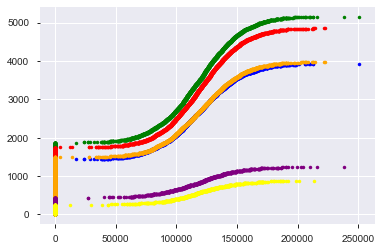

In [374]:
#ecdf
_ = plt.plot(np.sort(ActiveBalance), np.arange(1, len(ActiveBalance)+1), color='green', marker='.', linestyle='none')
_ = plt.plot(np.sort(NoActiveBalance), np.arange(1, len(NoActiveBalance)+1), color='red', marker='.', linestyle='none')
_ = plt.plot(np.sort(Active45Less), np.arange(1, len(Active45Less)+1), color='blue', marker='.', linestyle='none')
_ = plt.plot(np.sort(NActive45Less), np.arange(1, len(NActive45Less)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(Active45Plus), np.arange(1, len(Active45Plus)+1), color='purple', marker='.', linestyle='none')
_ = plt.plot(np.sort(NActive45Plus), np.arange(1, len(NActive45Plus)+1), color='yellow', marker='.', linestyle='none')
#age45
#active seems to only affect 0 balnce 

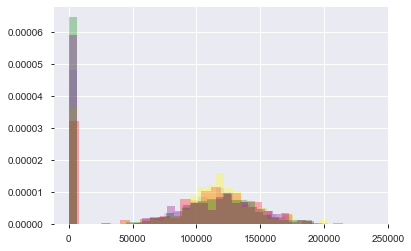

In [354]:
#group/control group balance hist, perm pairs, p value

#not active female >45
#age > 45 balance
Female45PlusBalance = Female.loc[Female['Age'] > 45]['Balance']
Male45PlusBalance = Male.loc[Male['Age'] > 45]['Balance']
Female45PlusExitedBalance = Female.loc[Female['Age'] > 45].loc[Female['Exited']==1]['Balance']
Male45PlusExitedBalance = Male.loc[Male['Age'] > 45].loc[Male['Exited']==1]['Balance']
Female45PlusStayedBalance = Female.loc[Female['Age'] > 45].loc[Female['Exited']==0]['Balance']
Male45PlusStayedBalance = Male.loc[Male['Age'] > 45].loc[Male['Exited']==0]['Balance']

_ = plt.hist(Female45PlusBalance, bins=30, alpha=0.1, color='pink', normed=True)
_ = plt.hist(Male45PlusBalance, bins=30, alpha=0.1, color='blue', normed=True)
_ = plt.hist(Female45PlusExitedBalance, bins=30, alpha=0.3, color='red', normed=True)
_ = plt.hist(Male45PlusExitedBalance, bins=30, alpha=0.3, color='yellow', normed=True)
_ = plt.hist(Female45PlusStayedBalance, bins=30, alpha=0.3, color='green', normed=True)
_ = plt.hist(Male45PlusStayedBalance, bins=30, alpha=0.3, color='purple', normed=True)


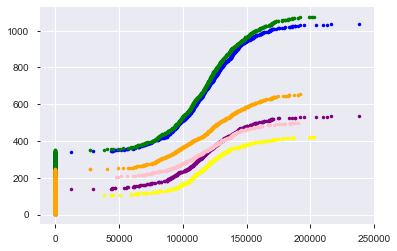

In [375]:
#ecdf
_ = plt.plot(np.sort(Female45PlusBalance), np.arange(1, len(Female45PlusBlance)+1), color='blue', marker='.', linestyle='none')
_ = plt.plot(np.sort(Male45PlusBalance), np.arange(1, len(Male45PlusBlance)+1), color='green', marker='.', linestyle='none')
_ = plt.plot(np.sort(Female45PlusExitedBalance), np.arange(1, len(Female45PlusExitedBlance)+1), color='purple', marker='.', linestyle='none')
_ = plt.plot(np.sort(Male45PlusExitedBalance), np.arange(1, len(Male45PlusExitedBlance)+1), color='yellow', marker='.', linestyle='none')
_ = plt.plot(np.sort(Female45PlusStayedBalance), np.arange(1, len(Female45PlusStayedBlance)+1), color='pink', marker='.', linestyle='none')
_ = plt.plot(np.sort(Male45PlusStayedBalance), np.arange(1, len(Male45PlusStayedBlance)+1), color='orange', marker='.', linestyle='none')
#age, exited 
#exited seems to affect dist, gender seems to affect 0 balance

In [393]:
#bs function
def bs_rep(data, func, size):
    rep = np.empty(size)
    for i in range(size):
        bs = np.random.choice(data, len(data))
        rep[i] = func(bs)
    return rep

#pm function
def pm_rep(data1, data2, func, size):
    reps = np.empty(size)
    for i in range(size):
        data = np.concatenate((data1, data2))
        pmdata = np.random.permutation(data)
        pmdata1 = pmdata[:len(data1)]
        pmdata2 = pmdata[len(data1):]
        reps[i] = func(pmdata1) - func(pmdata2)
        _ = plt.plot(np.sort(pmdata1), np.arange(1, len(pmdata1)+1), alpha=0.01, color='blue', marker='.', linestyle='none')
        _ = plt.plot(np.sort(pmdata2), np.arange(1, len(pmdata2)+1), alpha=0.01, color='orange', marker='.', linestyle='none')
    return reps


0.0008

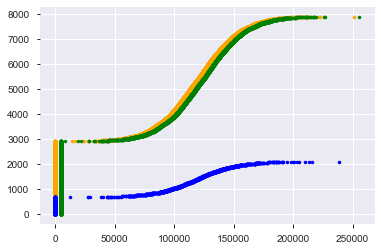

In [426]:
##hypothesis: age 45 before and after have different balance mean
#test: bs; test statistic: diff of mean
#H0: same mean; HA: diff mean

#group age<=45 and age>45
Age45Less = data.loc[data['Age']<=45]['Balance']
Age45Plus = data.loc[data['Age']>45]['Balance']

_ = plt.plot(np.sort(Age45Less), np.arange(1, len(Age45Less)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(Age45Plus), np.arange(1, len(Age45Plus)+1), color='blue', marker='.', linestyle='none')


#empirical diff of mean
Ep45Diff = np.mean(Age45Plus) - np.mean(Age45Less)

#shifted 
UniMean = np.mean(Age45Plus + Age45Less)
Age45LessShifted = Age45Less - np.mean(Age45Less) + np.mean(Age45Plus)
_ = plt.plot(np.sort(Age45LessShifted), np.arange(1, len(Age45LessShifted)+1), color='green', marker='.', linestyle='none')


#bs
np.random.seed(42)
n = 10000
Bs45Diff = bs_rep(Age45Plus, np.mean, n) - bs_rep(Age45LessShifted, np.mean, n)


#p
p = np.sum(Bs45Diff >= Ep45Diff)/n
p
#0.0008
#not likely to have same mean

0.001

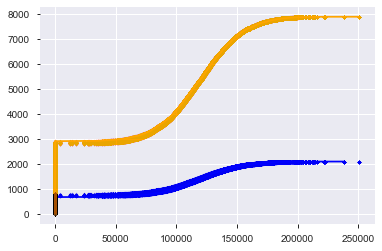

In [448]:

##hypothesis: age 45 before and after no 0 balance have different balance dist and mean
#test: pm; test statistic: diff mean
#H0: same dist; HA: diff dist

#Age45LessNZ = data.loc[data['Age']<=45].loc[data['Balance'] != 0]['Balance']
#Age45PlusNZ = data.loc[data['Age']>45].loc[data['Balance'] != 0]['Balance']
_ = plt.plot(np.sort(Age45Less), np.arange(1, len(Age45Less)+1), color='orange')
_ = plt.plot(np.sort(Age45Plus), np.arange(1, len(Age45Plus)+1), color='blue')

n = 1000
np.random.seed(42)
Ep45Diff = np.mean(Age45Plus) - np.mean(Age45Less)
Pm45Diff = pm_rep(Age45Plus, Age45Less, np.mean, n)
p = np.sum(Pm45Diff >= Ep45Diff)/n
p
#p value 0.001 not likely have same means 
#two parts from same distribution 
    

0.3859

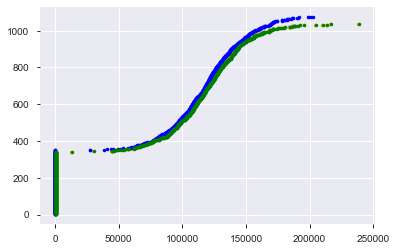

In [430]:
#hypothesis: female&male 45 same means
#bs
#groups 
Female45PlusBalance = Female.loc[Female['Age'] > 45]['Balance']
Male45PlusBalance = Male.loc[Male['Age'] > 45]['Balance']
_ = plt.plot(np.sort(Female45PlusBalance), np.arange(1, len(Female45PlusBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(Male45PlusBalance), np.arange(1, len(Male45PlusBalance)+1), color='blue', marker='.', linestyle='none')

#empirical
EpFMDiff = np.mean(Male45PlusBalance) - np.mean(Female45PlusBalance)

#shifted
Female45PlusShifted = Female45PlusBalance - np.mean(Female45PlusBalance) + np.mean(Male45PlusBalance)
_ = plt.plot(np.sort(Female45PlusShifted), np.arange(1, len(Female45PlusShifted)+1), color='green', marker='.', linestyle='none')

#bs
np.random.seed(42)
n = 10000
BsFMDiff = bs_rep(Male45PlusBalance, np.mean, n) - bs_rep(Female45PlusShifted, np.mean, n)
p = np.sum(BsFMDiff >= EpFMDiff)/n
p
#0.3859 female&male 45 might have same means


0.397

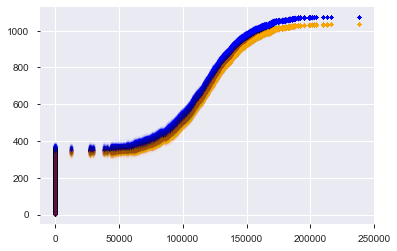

In [396]:
#hypothesis: female&male 45 same dists and means
#groups
Female45PlusBalance = Female.loc[Female['Age'] > 45]['Balance']
Male45PlusBalance = Male.loc[Male['Age'] > 45]['Balance']
_ = plt.plot(np.sort(Female45PlusBalance), np.arange(1, len(Female45PlusBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(Male45PlusBalance), np.arange(1, len(Male45PlusBalance)+1), color='blue', marker='.', linestyle='none')

#pm
n = 1000
np.random.seed(42)
EpFMDiff = np.mean(Male45PlusBalance) - np.mean(Female45PlusBalance)
PmFMDiff = pm_rep(Male45PlusBalance, Female45PlusBalance, np.mean, n)
p = np.sum(PmFMDiff >= EpFMDiff)/n
p
#0.397


#age>45 female and male likely to have same dist and might same means

0.0199

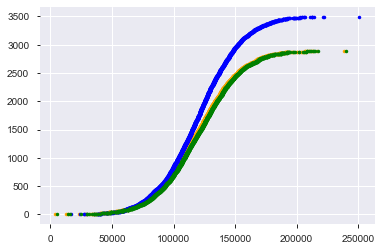

In [435]:
#hyphothesis: female&male non 0 balance have same mean and dist
#groups
FemaleBalanceNZ = Female.loc[Female['Balance'] != 0]['Balance']
MaleBalanceNZ = Male.loc[Male['Balance'] != 0]['Balance']

_ = plt.plot(np.sort(FemaleBalanceNZ), np.arange(1, len(FemaleBalanceNZ)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(MaleBalanceNZ), np.arange(1, len(MaleBalanceNZ)+1), color='blue', marker='.', linestyle='none')

#shifted
FemaleBalanceNZShifted = FemaleBalanceNZ - np.mean(FemaleBalanceNZ) + np.mean(MaleBalanceNZ)
_ = plt.plot(np.sort(FemaleBalanceNZShifted), np.arange(1, len(FemaleBalanceNZShifted)+1), color='green', marker='.', linestyle='none')


#bs
n = 10000
np.random.seed(42)
EpFMNZDiff = np.mean(MaleBalanceNZ) - np.mean(FemaleBalanceNZ)
BsFMNZDiff = bs_rep(MaleBalanceNZ, np.mean, n) - bs_rep(FemaleBalanceNZShifted, np.mean, n)
p = np.sum(BsFMNZDiff >= EpFMNZDiff)/n
p
#0.0199 not enough to reject null




0.021

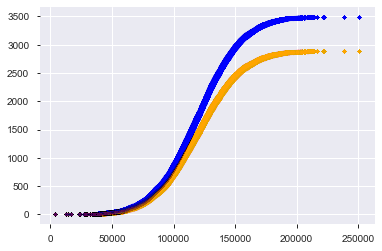

In [436]:
#hyphothesis: female&male non 0 balance have same mean and dist
#groups
FemaleBalanceNZ = Female.loc[Female['Balance'] != 0]['Balance']
MaleBalanceNZ = Male.loc[Male['Balance'] != 0]['Balance']

_ = plt.plot(np.sort(FemaleBalanceNZ), np.arange(1, len(FemaleBalanceNZ)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(MaleBalanceNZ), np.arange(1, len(MaleBalanceNZ)+1), color='blue', marker='.', linestyle='none')

#pm
n = 1000
np.random.seed(42)
EpFMNZDiff = np.mean(MaleBalanceNZ) - np.mean(FemaleBalanceNZ)
PmFMNZDiff = pm_rep(MaleBalanceNZ, FemaleBalanceNZ, np.mean, n)
p = np.sum(PmFMNZDiff >= EpFMNZDiff)/n
p
#0.021 can have same mean, likly same dist

0.115

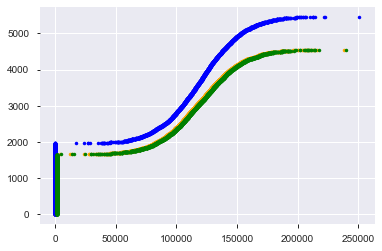

In [449]:
#hyphothesis: female&male balance have same mean and dist
#groups
FemaleBalance = Female['Balance']
MaleBalance = Male['Balance']

_ = plt.plot(np.sort(FemaleBalance), np.arange(1, len(FemaleBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(MaleBalance), np.arange(1, len(MaleBalance)+1), color='blue', marker='.', linestyle='none')

#shifted
FemaleBalanceShifted = FemaleBalance - np.mean(FemaleBalance) + np.mean(MaleBalance)
_ = plt.plot(np.sort(FemaleBalanceShifted), np.arange(1, len(FemaleBalanceShifted)+1), color='green', marker='.', linestyle='none')


#bs
n = 10000
np.random.seed(42)
EpFMDiff = np.mean(MaleBalance) - np.mean(FemaleBalance)
BsFMDiff = bs_rep(MaleBalance, np.mean, n) - bs_rep(FemaleBalanceShifted, np.mean, n)
p = np.sum(BsFMDiff >= EpFMDiff)/n
p
#0.115


0.118

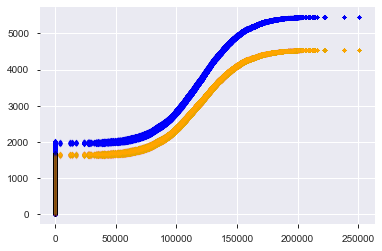

In [450]:
#hyphothesis: female&male balance have same mean and dist
#groups
FemaleBalance = Female['Balance']
MaleBalance = Male['Balance']

_ = plt.plot(np.sort(FemaleBalance), np.arange(1, len(FemaleBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(MaleBalance), np.arange(1, len(MaleBalance)+1), color='blue', marker='.', linestyle='none')

#pm
n = 1000
np.random.seed(42)
EpFMDiff = np.mean(MaleBalance) - np.mean(FemaleBalance)
PmFMDiff = pm_rep(MaleBalance, FemaleBalance, np.mean, n)
p = np.sum(PmFMDiff >= EpFMDiff)/n
p
#0.118

0.837

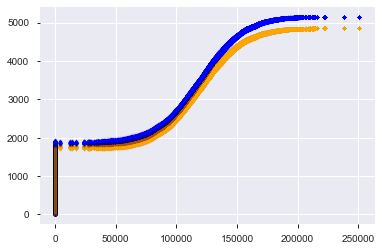

In [397]:
#hypothesis: active&not same dist
#groups
IsActiveBalance = data.loc[data['IsActiveMember'] == 1]['Balance']
NotActiveBalance = data.loc[data['IsActiveMember'] == 0]['Balance']
_ = plt.plot(np.sort(NotActiveBalance), np.arange(1, len(NotActiveBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(IsActiveBalance), np.arange(1, len(IsActiveBalance)+1), color='blue', marker='.', linestyle='none')

#pm
n = 1000
np.random.seed(42)
EpActDiff = np.mean(IsActiveBalance) - np.mean(NotActiveBalance)
PmActDiff = pm_rep(IsActiveBalance, NotActiveBalance, np.mean, n)
p = np.sum(PmActDiff >= EpActDiff)/n
p

#0.837 active and non active likely to have same dist and mean

0.845

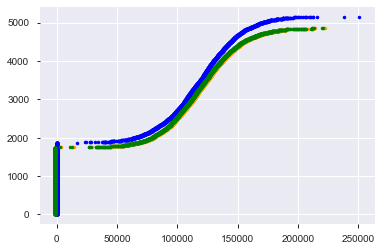

In [425]:
#hypothesis: active&not same mean
IsActiveBalance = data.loc[data['IsActiveMember'] == 1]['Balance']
NotActiveBalance = data.loc[data['IsActiveMember'] == 0]['Balance']
_ = plt.plot(np.sort(NotActiveBalance), np.arange(1, len(NotActiveBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(IsActiveBalance), np.arange(1, len(IsActiveBalance)+1), color='blue', marker='.', linestyle='none')

#emprical diff mean
EpActDiff = np.mean(IsActiveBalance) - np.mean(NotActiveBalance)

#shifted
NotActiveShifted = NotActiveBalance - np.mean(NotActiveBalance) + np.mean(IsActiveBalance)
_ = plt.plot(np.sort(NotActiveShifted), np.arange(1, len(NotActiveShifted)+1), color='green', marker='.', linestyle='none')


#bs
n = 10000
np.random.seed(42)
BsActDiff = bs_rep(IsActiveBalance, np.mean, n) - bs_rep(NotActiveShifted, np.mean, n)
p = np.sum(BsActDiff >= EpActDiff)/n
p
#0.845 likely to have same means



0.9492

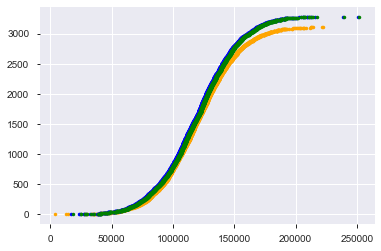

In [451]:
#hypothesis: active&not same mean
IsActiveNZBalance = data.loc[data['IsActiveMember'] == 1].loc[data['Balance']!=0]['Balance']
NotActiveNZBalance = data.loc[data['IsActiveMember'] == 0].loc[data['Balance']!=0]['Balance']
_ = plt.plot(np.sort(NotActiveNZBalance), np.arange(1, len(NotActiveNZBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(IsActiveNZBalance), np.arange(1, len(IsActiveNZBalance)+1), color='blue', marker='.', linestyle='none')

#emprical diff mean
EpActNZDiff = np.mean(IsActiveNZBalance) - np.mean(NotActiveNZBalance)

#shifted
IsActiveNZShifted = IsActiveNZBalance - np.mean(IsActiveNZBalance) + np.mean(NotActiveNZBalance)
_ = plt.plot(np.sort(IsActiveNZShifted), np.arange(1, len(IsActiveNZShifted)+1), color='green', marker='.', linestyle='none')


#bs
n = 10000
np.random.seed(42)
BsActNZDiff = bs_rep(IsActiveNZShifted, np.mean, n) - bs_rep(NotActiveNZBalance, np.mean, n)
p = np.sum(BsActNZDiff >= EpActNZDiff)/n
p
#0.9492 likely same mean

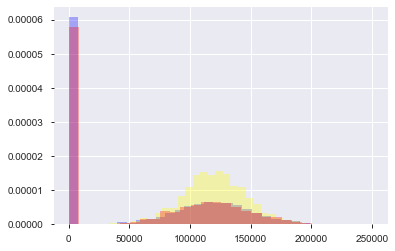

In [355]:
#country
France = data.loc[data['France'] == 1]
Germany = data.loc[data['Germany'] == 1]
Spain = data.loc[data['Spain'] == 1]

FranceBalance = France['Balance']
GermanyBalance = Germany['Balance']
SpainBalance = Spain['Balance']

_ = plt.hist(FranceBalance, bins=30, alpha=0.3, color='blue', normed=True)
_ = plt.hist(GermanyBalance, bins=30, alpha=0.3, color='yellow', normed=True)
_ = plt.hist(SpainBalance, bins=30, alpha=0.3, color='red', normed=True)

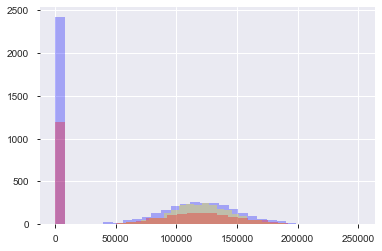

In [457]:
#country
France = data.loc[data['France'] == 1]
Germany = data.loc[data['Germany'] == 1]
Spain = data.loc[data['Spain'] == 1]

FranceBalance = France['Balance']
GermanyBalance = Germany['Balance']
SpainBalance = Spain['Balance']

_ = plt.hist(FranceBalance, bins=30, alpha=0.3, color='blue')
_ = plt.hist(GermanyBalance, bins=30, alpha=0.3, color='yellow')
_ = plt.hist(SpainBalance, bins=30, alpha=0.3, color='red')

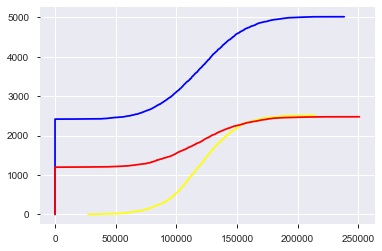

In [358]:
#ecdf
_ = plt.plot(np.sort(FranceBalance), np.arange(1, len(FranceBalance)+1), color='blue')
_ = plt.plot(np.sort(GermanyBalance), np.arange(1, len(GermanyBalance)+1), color='yellow')
_ = plt.plot(np.sort(SpainBalance), np.arange(1, len(SpainBalance)+1), color='red')


0.424

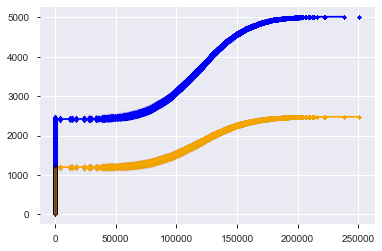

In [439]:
#hypothesis: country dist different 
#pm
#fr-sp
_ = plt.plot(np.sort(FranceBalance), np.arange(1, len(FranceBalance)+1), color='blue')
#_ = plt.plot(np.sort(GermanyBalance), np.arange(1, len(GermanyBalance)+1), color='yellow')
_ = plt.plot(np.sort(SpainBalance), np.arange(1, len(SpainBalance)+1), color='orange')

FranceBalance = France['Balance']
GermanyBalance = Germany['Balance']
SpainBalance = Spain['Balance']

#pm
np.random.seed(42)
n = 1000
EpFRSPDiff = np.mean(FranceBalance) - np.mean(SpainBalance)
PmFRSPDiff = pm_rep(FranceBalance, SpainBalance, np.mean, n)
p = np.sum(PmFRSPDiff >= EpFRSPDiff)/n
p
#0.424 likely same dist and mean


0.4342

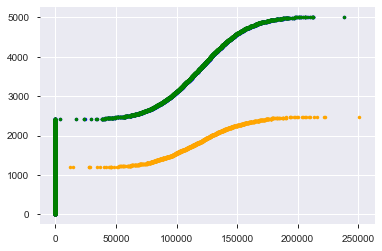

In [453]:
#fr-sp
FranceBalance = France['Balance']
SpainBalance = Spain['Balance']
_ = plt.plot(np.sort(SpainBalance), np.arange(1, len(SpainBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(FranceBalance), np.arange(1, len(FranceBalance)+1), color='blue', marker='.', linestyle='none')

#emprical diff mean
EpFRSPDiff = np.mean(FranceBalance) - np.mean(SpainBalance)

#shifted
FranceBalanceShifted = FranceBalance - np.mean(FranceBalance) + np.mean(SpainBalance)
_ = plt.plot(np.sort(FranceBalanceShifted), np.arange(1, len(FranceBalanceShifted)+1), color='green', marker='.', linestyle='none')


#bs
n = 10000
np.random.seed(42)
BsFRSPDiff = bs_rep(FranceBalanceShifted, np.mean, n) - bs_rep(SpainBalance, np.mean, n)
p = np.sum(BsFRSPDiff >= EpFRSPDiff)/n
p

0.0

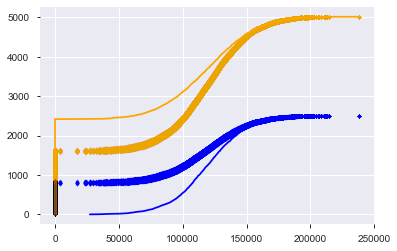

In [440]:
#pm fr-gr
_ = plt.plot(np.sort(FranceBalance), np.arange(1, len(FranceBalance)+1), color='orange')
_ = plt.plot(np.sort(GermanyBalance), np.arange(1, len(GermanyBalance)+1), color='blue')
#_ = plt.plot(np.sort(SpainBalance), np.arange(1, len(SpainBalance)+1), color='orange')

#pm
np.random.seed(42)
n = 1000
EpFRGRDiff = np.mean(GermanyBalance) - np.mean(FranceBalance)
PmFRGRDiff = pm_rep(GermanyBalance, FranceBalance, np.mean, n)
p = np.sum(PmFRGRDiff >= EpFRGRDiff)/n
p
#0.0 not same dist or mean

0.0

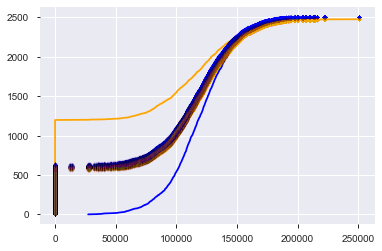

In [441]:
#pm sp-gr
#_ = plt.plot(np.sort(FranceBalance), np.arange(1, len(FranceBalance)+1), color='orange')
_ = plt.plot(np.sort(GermanyBalance), np.arange(1, len(GermanyBalance)+1), color='blue')
_ = plt.plot(np.sort(SpainBalance), np.arange(1, len(SpainBalance)+1), color='orange')

#pm
np.random.seed(42)
n = 1000
EpSPGRDiff = np.mean(GermanyBalance) - np.mean(SpainBalance)
PmSPGRDiff = pm_rep(GermanyBalance, SpainBalance, np.mean, n)
p = np.sum(PmSPGRDiff >= EpSPGRDiff)/n
p
#0.0 not same dist or mean

0.561

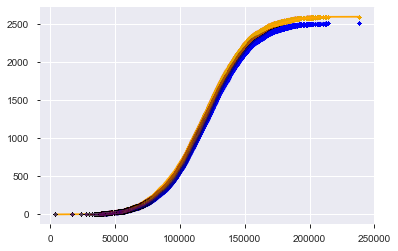

In [452]:
#pm frNZ-gr
FranceBalanceNZ = France.loc[France['Balance']!=0]['Balance']
GermanyBalance = Germany['Balance']

_ = plt.plot(np.sort(FranceBalanceNZ), np.arange(1, len(FranceBalanceNZ)+1), color='orange')
_ = plt.plot(np.sort(GermanyBalance), np.arange(1, len(GermanyBalance)+1), color='blue')
#_ = plt.plot(np.sort(SpainBalance), np.arange(1, len(SpainBalance)+1), color='orange')

#pm
np.random.seed(42)
n = 1000
EpFRNZGRDiff = np.mean(GermanyBalance) - np.mean(FranceBalanceNZ)
PmFRNZGRDiff = pm_rep(GermanyBalance, FranceBalanceNZ, np.mean, n)
p = np.sum(PmFRNZGRDiff >= EpFRNZGRDiff)/n
p
#00.561

0.4117

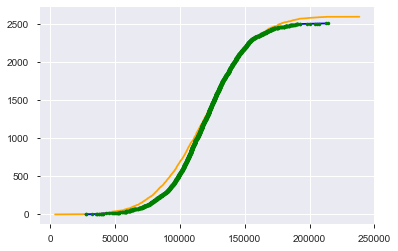

In [455]:
#frNZ-gr
FranceBalanceNZ = France.loc[France['Balance']!=0]['Balance']
GermanyBalance = Germany['Balance']

_ = plt.plot(np.sort(FranceBalanceNZ), np.arange(1, len(FranceBalanceNZ)+1), color='orange')
_ = plt.plot(np.sort(GermanyBalance), np.arange(1, len(GermanyBalance)+1), color='blue')


#emprical diff mean
EpFRNZGRDiff = np.mean(FranceBalanceNZ) - np.mean(GermanyBalance)

#shifted
GermanyBalanceShifted = GermanyBalance - np.mean(GermanyBalance) + np.mean(FranceBalanceNZ)
_ = plt.plot(np.sort(GermanyBalanceShifted), np.arange(1, len(GermanyBalanceShifted)+1), color='green', marker='.', linestyle='none')


#bs
n = 10000
np.random.seed(42)
BsFRNZGRDiff = bs_rep(FranceBalanceNZ, np.mean, n) - bs_rep(GermanyBalanceShifted, np.mean, n)
p = np.sum(BsFRNZGRDiff >= EpFRNZGRDiff)/n
p

In [ ]:
##In-Depth Analysis


In [82]:
#import pakages
#preprocessing-scaler for log
#cross validaton - split, k fold, cv score
#feature selction chi2
#grid search, random search
#logistic regression, random forest, etratreeclf, gradient boosting, xgboost catboost lightgbm, svm
#metrics - accuracy score, classification report, confusion matrix, roc auc curve
#pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

#from sklearn.linear_model import Ridge, Lasso

from catboost import CatBoostClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, make_scorer

from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.dummy import DummyClassifier



In [4]:
#split data
X = data.iloc[:, 0:13]
Y = data.iloc[:, 13]
x, xtest, y, ytest = train_test_split(X, Y, test_size=0.2, random_state=10)


In [38]:
#dummy model
dummy = DummyClassifier(random_state=10)



In [117]:
cross_val_score(dummy, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.683125, 0.683125, 0.674375, 0.693125, 0.676875])

cross_val_score(dummy, x, y, cv=5, scoring='roc_auc')
#array([0.51122018, 0.51122018, 0.49764347, 0.52673643, 0.50152253])



/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegression(C=0.03, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=5, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
#hyper param for logreg with scaler
#training
logparams = {'l1_ratio':[0, 0.1, 0.3, 0.5, 0.7, 0.9, 1], 'intercept_scaling':[0.01, 0.1, 1, 5, 10], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(solver='saga', penalty='elasticnet', random_state=10)
logsearch = GridSearchCV(logreg, param_grid=logparams, scoring=make_scorer(accuracy_score))
scaler = StandardScaler()
kf = KFold(n_splits=5, random_state=10)

xs = scaler.fit_transform(x)
logsearch.fit(xs, y)
logsearch.best_estimator_
#C=0.1,intercept_scaling=0.01, l1_ratio=0


/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: 

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=0.01, l1_ratio=0, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=10, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
#logreg pipeline training
#with scaler and chi2kbest and with scaler only
selectchi2 = SelectKBest(score_func=chi2)
scaler = StandardScaler()
logreg = LogisticRegression(solver='saga', penalty='elasticnet', random_state=10)

#pipelines
logpipe = Pipeline([('scaler', scaler), ('logreg', logreg)])
loggrid = {'logreg__l1_ratio':[0, 0.1, 0.3, 0.5, 0.7, 0.9, 1], 'logreg__C':[0.001, 0.01, 0.1, 1, 10, 100]}

logpipe2 = Pipeline([('selectchi2', selectchi2), ('scaler', scaler), ('logreg', logreg)])
loggrid2 = {'selectchi2__k':[1, 5, 10, 13], 'logreg__l1_ratio':[0, 0.1, 0.3, 0.5, 0.7, 0.9, 1], 'logreg__C':[0.001, 0.01, 0.1, 1, 10, 100]}

loggridsearch = GridSearchCV(logpipe, param_grid=loggrid, scoring=make_scorer(accuracy_score), cv=5)
loggridsearch.fit(x, y)

loggrid2search = GridSearchCV(logpipe2, param_grid=loggrid2, scoring=make_scorer(accuracy_score), cv=5)
loggrid2search.fit(x, y)


/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reac

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('selectchi2',
                                        SelectKBest(k=10,
                                                    score_func=<function chi2 at 0x1a16e00a70>)),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
          

In [9]:
loggridsearch.best_estimator_
#C=0.01, l1_ratio=0.3 (acuracy score)

loggrid2search.best_estimator_
#k=10, C=0.1, l1_ratio=0.5 (acuracy score)


Pipeline(memory=None,
         steps=[('selectchi2',
                 SelectKBest(k=10, score_func=<function chi2 at 0x1a16e00a70>)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=0.5, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='elasticnet', random_state=10,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
cross_val_score(loggridsearch, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.804375, 0.8175  , 0.813125, 0.821875, 0.805625])

cross_val_score(loggrid2search, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.804375, 0.815625, 0.816875, 0.82    , 0.805625])

In [45]:
#roc scoring
logpipe = Pipeline([('scaler', scaler), ('logreg', logreg)])
loggrid = {'logreg__l1_ratio':[0, 0.1, 0.3, 0.5, 0.7, 0.9, 1], 'logreg__C':[0.001, 0.01, 0.1, 1, 10, 100]}

logpipe2 = Pipeline([('selectchi2', selectchi2), ('scaler', scaler), ('logreg', logreg)])
loggrid2 = {'selectchi2__k':[1, 5, 10, 13], 'logreg__l1_ratio':[0, 0.1, 0.3, 0.5, 0.7, 0.9, 1], 'logreg__C':[0.001, 0.01, 0.1, 1, 10, 100]}

loggridsearchra = GridSearchCV(logpipe, param_grid=loggrid, scoring='roc_auc', cv=5)
loggridsearchra.fit(x, y)

loggrid2searchra = GridSearchCV(logpipe2, param_grid=loggrid2, scoring='roc_auc', cv=5)
loggrid2searchra.fit(x, y)

/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reac

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('selectchi2',
                                        SelectKBest(k=10,
                                                    score_func=<function chi2 at 0x1a16e00a70>)),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
          

In [16]:
loggridsearchra.best_estimator_
#(roc_auc) C=0.001, l1_ratio=0.1

loggrid2searchra.best_estimator_
#(roc_auc) k=10, C=0.001, l1_ratio=0.1

Pipeline(memory=None,
         steps=[('selectchi2',
                 SelectKBest(k=10, score_func=<function chi2 at 0x1a16e00a70>)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=0.001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=0.1, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='elasticnet', random_state=10,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [67]:
cross_val_score(loggridsearchra, x, y, cv=5, scoring='roc_auc')
#array([0.75135828, 0.78947975, 0.7737744 , 0.77345316, 0.76910134])

cross_val_score(loggrid2searchra, x, y, cv=5, scoring='roc_auc')
#array([0.75135828, 0.78950156, 0.77521086, 0.77345559, 0.76910134])


/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reac

array([0.75135828, 0.78950156, 0.77521086, 0.77345559, 0.76910134])

In [18]:
#decision tree training 
dtree = DecisionTreeClassifier(random_state=10)
dtreeparams = {'max_depth':[5, 6, 7, 8, 9, 10, 11], 'max_features':[5, 7, 8, 9, 10, 11] }
dtreesearch = GridSearchCV(dtree, param_grid=dtreeparams, scoring=make_scorer(accuracy_score)

dtreesearch.fit(x, y)
dtreesearch.best_estimator_
#max_depth=6, max_features=10
                                                  

SyntaxError: invalid syntax (<ipython-input-18-cfd3c1c5491a>, line 6)

In [ ]:
cross_val_score(dtreesearch, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.8525  , 0.860625, 0.8575  , 0.87125 , 0.84875 ])
 

In [21]:
#decision tree training
dtree = DecisionTreeClassifier(random_state=10)
dtreeparams = {'max_depth':[5, 6, 7, 8, 9, 10, 11], 'max_features':[5, 7, 8, 9, 10, 11] }
dtreesearchra = GridSearchCV(dtree, param_grid=dtreeparams, scoring='roc_auc')

dtreesearchra.fit(x, y)
dtreesearchra.best_estimator_
#max_depth=6, max_features=11


/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [ ]:
cross_val_score(dtreesearch, x, y, cv=5, scoring='roc_auc')
#array([0.82297665, 0.82512468, 0.82198385, 0.86229456, 0.8297347 ])



In [28]:
#extra tree training
extree = ExtraTreeClassifier(random_state=10)
extreeparams = {'max_depth':[5, 6, 7, 8, 9, 10, 11]}
extreesearch = GridSearchCV(extree, param_grid=extreeparams, scoring=make_scorer(accuracy_score))

extreesearch.fit(x, y)
extreesearch.best_estimator_
#max_depth=9



/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=10,
                    splitter='random')

In [ ]:
cross_val_score(extreesearch, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.816875, 0.81    , 0.811875, 0.82125 , 0.8225  ])


In [22]:
#extra tree training
extree = ExtraTreeClassifier(random_state=10)
extreeparams = {'max_depth':[5, 6, 7, 8, 9, 10, 11]}
extreesearchra = GridSearchCV(extree, param_grid=extreeparams, scoring='roc_auc')

extreesearchra.fit(x, y)
extreesearchra.best_estimator_
#max_depth=8


/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=10,
                    splitter='random')

In [ ]:
cross_val_score(extreesearch, x, y, cv=5, scoring='roc_auc')
#array([0.70734549, 0.76358459, 0.72173195, 0.7451639 , 0.75032063])


In [30]:
#extra trees training
extrees = ExtraTreesClassifier(random_state=10)
extreesparams = {'n_estimators':[5, 8, 9, 10, 11, 12, 15, 18, 19, 20], 'max_depth':[8, 9, 10, 11, 12, 13, 14, 15, 16]}
extreessearch = GridSearchCV(extrees, param_grid=extreesparams, scoring=make_scorer(accuracy_score))

extreessearch.fit(x, y)
extreessearch.best_estimator_
#max_depth=12, n_estimators=18


/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  w

array([0.853125, 0.85875 , 0.8575  , 0.86    , 0.853125])

In [ ]:
cross_val_score(extreessearch, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.853125, 0.85875 , 0.8575  , 0.86    , 0.853125])


In [24]:
#training
extrees = ExtraTreesClassifier(random_state=10)
extreesparams = {'n_estimators':[5, 8, 9, 10, 11, 12, 15, 18, 19, 20], 'max_depth':[8, 9, 10, 11, 12, 13, 14, 15, 16]}
extreessearchra = GridSearchCV(extrees, param_grid=extreesparams, scoring='roc_auc')

extreessearchra.fit(x, y)
extreessearchra.best_estimator_
#max_depth=10, n_estimators=20


/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=10, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
                     oob_score=False, random_state=10, verbose=0,
                     warm_start=False)

In [ ]:
cross_val_score(extreessearch, x, y, cv=5, scoring='roc_auc')
#array([0.82843157, 0.86204727, 0.84859178, 0.85563349, 0.84272106])


In [98]:
#gradient boosting for entire training
gdboost = GradientBoostingClassifier(random_state=10)
#gdboostparams = {'loss': ['deviance', 'exponential'], 'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5], 'n_estimators':[10, 100, 300, 500, 800, 1200], 'max_depth':[5, 8, 15, 25, 30], 'max_features': ['log2', 'sqrt'], 'min_samples_split':[1.0, 2 ,5 ,10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
gdboostparams = {'loss': ['deviance', 'exponential'], 'learning_rate': [0.01, 0.1, 0.3, 0.5], 'n_estimators':[10, 100, 500, 800], 'max_depth':[5, 8, 15, 25], 'max_features': ['log2', 'sqrt']}
gdboostsearch = GridSearchCV(gdboost, param_grid=gdboostparams, scoring=make_scorer(accuracy_score), cv=5)
gdboostsearch.fit(x, y)
gdboostsearch.best_estimator_
#learning_rate=0.01, loss='deviance', max_depth=5,
#max_features='log2', max_leaf_nodes=None,
#min_impurity_decrease=0.0, min_impurity_split=None,
#min_samples_leaf=1, min_samples_split=2,
#min_weight_fraction_leaf=0.0, n_estimators=800

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [100]:
cross_val_score(gdboostsearch, x, y, cv=5, scoring=make_scorer(accuracy_score))
#computation time too long

KeyboardInterrupt: 

In [25]:
#training
gdboost = GradientBoostingClassifier(random_state=10)
#gdboostparams = {'loss': ['deviance', 'exponential'], 'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5], 'n_estimators':[10, 100, 300, 500, 800, 1200], 'max_depth':[1, 5, 8, 15, 25, 30], 'max_features': ['log2', 'sqrt'], 'min_samples_split':[1.0, 2 ,5 ,10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
gdboostparams = {'loss': ['deviance', 'exponential'], 'learning_rate': [0.01, 0.1, 0.3, 0.5], 'n_estimators':[10, 100, 500, 800], 'max_depth':[5, 8, 15, 25], 'max_features': ['log2', 'sqrt']}
gdboostsearchra = GridSearchCV(gdboost, param_grid=gdboostparams, scoring='roc_auc', cv=5)
gdboostsearchra.fit(x, y)
gdboostsearchra.best_estimator_
#learning_rate=0.01, loss='deviance', max_depth=5,
#max_features='log2', max_leaf_nodes=None,
#min_impurity_decrease=0.0, min_impurity_split=None,
#min_weight_fraction_leaf=0.0, n_estimators=800,

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
cross_val_score(gdboostsearch, x, y, cv=5, scoring='roc_auc')
#computation time too long


In [ ]:
#random forest
#forestparams = {'n_estimators':[5, 10, 20, 30, 50, 100, 300, 500, 800], 'max_depth':[5, 8, 15, 25, 30, 100], 'max_features':['log2', 'sqrt', 'auto'], 'min_samples_split':[1.0, 2, 5, 10, 15, 100], 'min_samples_leaf':[1, 2, 5, 10]}
forestparams = {'n_estimators':[50, 100, 300, 500, 800], 'max_depth':[5, 15, 25, 30, 100], 'max_features':['log2', 'sqrt', 'auto'], 'min_samples_split':[5, 10, 15, 100], 'min_samples_leaf':[1, 2, 5, 10]}
forest = RandomForestClassifier(random_state=10)
forestsearch = GridSearchCV(forest, param_grid=forestparams, scoring=make_scorer(accuracy_score))  

forestsearch.fit(x, y)
forestsearch.best_estimator_
#max_depth=25, max_features='log2', min_samples_leaf=1, min_samples_split=15, n_estimators=500
#max_depth=15, max_features='log2', min_samples_leaf=2, min_samples_split=15, n_estimators=30,

In [26]:
#training
#forestparams = {'n_estimators':[5, 10, 20, 30, 50, 100, 300, 500, 800], 'max_depth':[5, 8, 15, 25, 30, 100], 'max_features':['log2', 'sqrt', 'auto'], 'min_samples_split':[1.0, 2, 5, 10, 15, 100], 'min_samples_leaf':[1, 2, 5, 10]}
forestparams = {'n_estimators':[50, 100, 300, 500, 800], 'max_depth':[5, 15, 25, 30, 100], 'max_features':['log2', 'sqrt', 'auto'], 'min_samples_split':[5, 10, 15, 100], 'min_samples_leaf':[1, 2, 5, 10]}
forest = RandomForestClassifier(random_state=10)
forestsearchra = GridSearchCV(forest, param_grid=forestparams, scoring='roc_auc', cv=5)

forestsearchra.fit(x, y)
forestsearchra.best_estimator_
#max_depth=25, max_features='log2',min_samples_leaf=10, min_samples_split=5, n_estimators=800

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [62]:
cross_val_score(forestsearch, x, y, cv=5, scoring='roc_auc')
#computation time too lang


KeyboardInterrupt: 

In [146]:
#catboost training

#default params
catboost = CatBoostClassifier(random_state=10)
#Learning rate set to 0.028332


Learning rate set to 0.028332
0:	learn: 0.6684125	total: 77.3ms	remaining: 1m 17s
1:	learn: 0.6451393	total: 91.4ms	remaining: 45.6s
2:	learn: 0.6249490	total: 99.8ms	remaining: 33.2s
3:	learn: 0.6050922	total: 109ms	remaining: 27s
4:	learn: 0.5880465	total: 122ms	remaining: 24.3s
5:	learn: 0.5715739	total: 130ms	remaining: 21.6s
6:	learn: 0.5553820	total: 138ms	remaining: 19.6s
7:	learn: 0.5441755	total: 145ms	remaining: 18s
8:	learn: 0.5330982	total: 153ms	remaining: 16.9s
9:	learn: 0.5212237	total: 162ms	remaining: 16s
10:	learn: 0.5103367	total: 169ms	remaining: 15.2s
11:	learn: 0.5007876	total: 177ms	remaining: 14.6s
12:	learn: 0.4894806	total: 186ms	remaining: 14.1s
13:	learn: 0.4809903	total: 200ms	remaining: 14.1s
14:	learn: 0.4732856	total: 206ms	remaining: 13.6s
15:	learn: 0.4631761	total: 221ms	remaining: 13.6s
16:	learn: 0.4548861	total: 228ms	remaining: 13.2s
17:	learn: 0.4498051	total: 236ms	remaining: 12.9s
18:	learn: 0.4439168	total: 249ms	remaining: 12.9s
19:	learn: 0.

array([0.859375, 0.87    , 0.8725  , 0.8725  , 0.85625 ])

In [ ]:
cross_val_score(catboost, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.859375, 0.87    , 0.8725  , 0.8725  , 0.85625 ])


In [36]:
catboost = CatBoostClassifier(random_state=10)


In [ ]:
cross_val_score(catboost, x, y, cv=5, scoring='roc_auc')
#array([0.84970095, 0.87922545, 0.86738462, 0.8772641 , 0.85517285])


In [80]:
#catboost training
catboost = CatBoostClassifier(random_state=10)
catboostparams = {'learning_rate':[0.02, 0.05, 0.08], 'n_estimators':[30, 50, 80], 'max_depth':[8, 12, 15, 16], 'boosting_type':['Ordered', 'Plain'], 'l2_leaf_reg':[0.5, 1, 2, 3]}
catboostsearch = catboost.grid_search(param_grid=catboostparams, X=x, y=y)
catboostsearch['params']
catboostsearch['cv_results']
#'depth': 16,'iterations': 80,'learning_rate': 0.08,'l2_leaf_reg': 0.5,'boosting_type': 'Ordered'

0:	loss: 0.4442028	best: 0.4442028 (0)	total: 2s	remaining: 9m 34s
1:	loss: 0.3710664	best: 0.3710664 (1)	total: 4s	remaining: 9m 31s
2:	loss: 0.3527260	best: 0.3527260 (2)	total: 5.79s	remaining: 9m 10s
3:	loss: 0.4419467	best: 0.3527260 (2)	total: 7.33s	remaining: 8m 40s
4:	loss: 0.3739255	best: 0.3527260 (2)	total: 8.73s	remaining: 8m 14s
5:	loss: 0.3557531	best: 0.3527260 (2)	total: 9.95s	remaining: 7m 47s
6:	loss: 0.4451173	best: 0.3527260 (2)	total: 11.4s	remaining: 7m 36s
7:	loss: 0.3738005	best: 0.3527260 (2)	total: 13.4s	remaining: 7m 48s
8:	loss: 0.3540521	best: 0.3527260 (2)	total: 14.8s	remaining: 7m 40s
9:	loss: 0.4450790	best: 0.3527260 (2)	total: 16.1s	remaining: 7m 26s
10:	loss: 0.3719422	best: 0.3527260 (2)	total: 17.3s	remaining: 7m 15s
11:	loss: 0.3545753	best: 0.3527260 (2)	total: 18.6s	remaining: 7m 8s
12:	loss: 0.3934407	best: 0.3527260 (2)	total: 20.6s	remaining: 7m 14s
13:	loss: 0.3526821	best: 0.3526821 (13)	total: 22.3s	remaining: 7m 15s
14:	loss: 0.3449053	be

defaultdict(list,
            {'iterations': [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              45,
              46,
              47,
              48,
              49,
              50,
              51,
              52,
              53,
      

In [76]:
##xgboost
xgb = XGBClassifier(random_state=10)
xgb.fit(x, y)



array([0.86125 , 0.869375, 0.87125 , 0.871875, 0.856875])

In [ ]:
cross_val_score(xgb, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.86125 , 0.869375, 0.87125 , 0.871875, 0.856875])

cross_val_score(xgb, x, y, cv=5, scoring='roc_auc')
#array([0.85996834, 0.87337292, 0.86513234, 0.87850055, 0.85907979])


In [86]:
#xgboost
#xgbparams = {'eta':[0.01, 0.015, 0.025, 0.05, 0.1], 'gamma':[0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1], 'max_depth':[3, 5, 7, 9, 12, 15, 17, 25], 'min_child_weight':[1, 3, 5, 7], 'subsample':[0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree':[0.6, 0.7, 0.8, 0.9, 1.0], 'lambda':[0.01, 0.1, 1.0], 'alpha':[0.0, 0.1, 0.5, 1.0], 'eval_metric':['error', 'auc']}
xgbparams = {'eta':[0.01, 0.025, 0.05, 0.1], 'gamma':[0.05, 0.1, 0.5, 1], 'max_depth':[3, 6, 9, 12, 16], 'lambda':[0.01, 0.1, 1.0], 'alpha':[0.0, 0.1, 0.5, 1.0], 'eval_metric':['error', 'auc']}
xgb = XGBClassifier(random_state=10)
xgbsearch = GridSearchCV(xgb, param_grid=xgbparams, scoring=make_scorer(accuracy_score), cv=5)
xgbsearch.fit(x, y)
xgbsearch.best_estimator_
#alpha=0.0, base_score=0.5, booster='gbtree', colsample_bylevel=1, eta=0.01, eval_metric='error', gamma=0.5, lambda=0.01, learning_rate=0.1,
#max_delta_step=0, max_depth=6, min_child_weight=1, missing=None, n_estimators=100, n_jobs=1, nthread=None,
#objective='binary:logistic', random_state=10, reg_alpha=0, reg_lambda=1, subsample=1

XGBClassifier(alpha=0.0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01,
              eval_metric='error', gamma=0.5, lambda=0.01, learning_rate=0.1,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [89]:
cross_val_score(xgbsearch, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.860625, 0.870625, 0.866875, 0.873125, 0.856875])


array([0.860625, 0.870625, 0.866875, 0.873125, 0.856875])

In [91]:
#xgboost
#xgbparams = {'eta':[0.01, 0.015, 0.025, 0.05, 0.1], 'gamma':[0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1], 'max_depth':[3, 5, 7, 9, 12, 15, 17, 25], 'min_child_weight':[1, 3, 5, 7], 'subsample':[0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree':[0.6, 0.7, 0.8, 0.9, 1.0], 'lambda':[0.01, 0.1, 1.0], 'alpha':[0.0, 0.1, 0.5, 1.0], 'eval_metric':['error', 'auc']}
xgbparams = {'eta':[0.01, 0.025, 0.05, 0.1], 'gamma':[0.05, 0.1, 0.5, 1], 'max_depth':[3, 6, 9, 12, 16], 'lambda':[0.01, 0.1, 1.0], 'alpha':[0.0, 0.1, 0.5, 1.0], 'eval_metric':['error', 'auc']}
xgb = XGBClassifier(random_state=10)
xgbsearchra = GridSearchCV(xgb, param_grid=xgbparams, scoring='roc_auc', cv=5)
xgbsearchra.fit(x, y)
xgbsearchra.best_estimator_
#alpha=0.0, base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=1, eta=0.01,
#eval_metric='error', gamma=0.1, lambda=0.01, learning_rate=0.1,max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
#n_estimators=100, n_jobs=1, nthread=None,objective='binary:logistic', random_state=10, reg_alpha=0,reg_lambda=1, s

XGBClassifier(alpha=0.0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01,
              eval_metric='error', gamma=0.1, lambda=0.01, learning_rate=0.1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
cross_val_score(xgbsearch, x, y, cv=5, scoring='roc_auc')
#compuatation time too long

In [63]:
#svc
svc = SVC(random_state=10)
svcparams = {'C':[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05], 'gamma':['auto', 'scale']}
svcsearch = GridSearchCV(svc, param_grid=svcparams, scoring=make_scorer(accuracy_score), cv=5)
svcsearch.fit(x, y)
svcsearch.best_estimator_
#C=1e-10, gamma='auto'


array([0.798125, 0.798125, 0.798125, 0.798125, 0.798125])

In [ ]:
cross_val_score(svcsearch, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.798125, 0.798125, 0.798125, 0.798125, 0.798125])


In [30]:
#svc
svc = SVC(random_state=10)
svcparams = {'C':[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05], 'gamma':['auto', 'scale']}
svcsearchrc = GridSearchCV(svc, param_grid=svcparams, scoring='roc_auc', cv=5)
svcsearchrc.fit(x, y)
svcsearchrc.best_estimator_


SVC(C=1e-08, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
cross_val_score(svcsearch, x, y, cv=5, scoring='roc_auc')
#array([0.56072063, 0.41270417, 0.53408361, 0.5361783 , 0.54396188])


In [7]:
#deep feature sythesis
#es = ft.EntitySet()
#es = es.entity_from_dataframe(dataframe=data, entity_id='customers', make_index=True, index='index')
#features, feature_names = ft.dfs(entityset=es, target_entity='customers', trans_primitives=['Percentile', 'CumSum', 'CumMean', 'CumCount'])


In [43]:
#new feature
#balance/age
data1 = pd.DataFrame.copy(data)
balage = np.array(data1['Balance'])/np.array(data1['Age'])
pd.DataFrame.insert(data1, 13, 'BalAge', balage)

#balance perncentile/age percentile
BalPercentile = [stats.percentileofscore(data1['Balance'], x) for x in data1['Balance']]
AgePercentile = [stats.percentileofscore(data1['Age'], x) for x in data1['Age']]
balageper = np.array(BalPercentile)/np.array(AgePercentile)
pd.DataFrame.insert(data1, 14, 'BalAgePercentile', balageper)

#split data
X1 = data1.iloc[:, 0:15]
Y1 = data1.iloc[:, 15]
x1, xtest1, y1, ytest1 = train_test_split(X1, Y1, test_size=0.2, random_state=10)


In [ ]:
data1.head()

In [57]:
#fitting into model and check if theres improvement

#dummy model
dummy = DummyClassifier(random_state=10)
cross_val_score(dummy, x1, y1, cv=5, scoring=make_scorer(accuracy_score))
#array([0.683125, 0.683125, 0.674375, 0.693125, 0.676875])
cross_val_score(dummy, x1, y1, cv=5, scoring='roc_auc')
#array([0.51122018, 0.51122018, 0.49764347, 0.52673643, 0.50152253])

#same as without new features


array([0.51122018, 0.51122018, 0.49764347, 0.52673643, 0.50152253])

In [59]:
loggridsearch.fit(x1, y1)
cross_val_score(loggridsearch, x1, y1, cv=5, scoring='roc_auc')
#array([0.75136313, 0.78949429, 0.77378167, 0.77345316, 0.76909892])

#same as without new features


/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/aqua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reac

array([0.75136313, 0.78949429, 0.77378167, 0.77345316, 0.76909892])

In [92]:
#roc curve and plot for training

logreg0 = LogisticRegression(solver='liblinear', penalty='l1', random_state=10)
logpipe0 = Pipeline([('scaler', scaler), ('logreg0', logreg0)])

names = ['dummy', 'scalerlog', 'gradientboosting', 'randomforest', 'xgboost', 'catboost', 'scalerloggrid', 'decisiontreegrid', 'extratreesgrid', 'gradientboostinggrid', 'randomforestgrid', 'xgboostgrid']
clfs = [dummy, logpipe0, gdboost, forest, xgb, catboost, loggridsearchra.best_estimator_, dtreesearchra.best_estimator_, extreessearchra.best_estimator_, gdboostsearchra.best_estimator_, forestsearchra.best_estimator_, xgbsearchra.best_estimator_]
#colors = cycle(['grey', 'red', 'orange', 'yellow', 'gold', 'lawngreen', 'lightseagreen', 'royalblue', 'aqua', 'blueviolet', 'pink', 'purple'])

rocaucs = {}
accuracy = {}
fprs = {}
tprs = {}


for name, clf in zip(names, clfs):
    clf.fit(x, y)
    if hasattr(clf, 'decision_function'):
        yscore = clf.decision_function(xtest)    
    else:
        yscore = clf.predict(xtest)
    
    ypredict = clf.predict(xtest)
    accuracy[name] = accuracy_score(ytest, ypredict)
    
    rocauc = roc_auc_score(ytest, yscore)
    rocaucs[name] = rocauc
    
rocaucs
accuracy
            
#{'dummy': 0.49100937655800425,
 #'scalerlog': 0.7534118417337923,
 #'gradientboosting': 0.8565802593720528,
 #'randomforest': 0.6983643582674091,
 #'xgboost': 0.7041368581022232,
 #'catboost': 0.7200082292661536,
 #'scalerloggrid': 0.754238522576421,
 #'decisiontreegrid': 0.699149742610179,
 #'extratreesgrid': 0.633624961706882,
 #'gradientboostinggrid': 0.8585812625015766,
 #'randomforestgrid': 0.6957739414580817,
 #'xgboostgrid': 0.7050048354447107}
    
#{'dummy': 0.6625,
 #'scalerlog': 0.7995,
 #'gradientboosting': 0.858,
 #'randomforest': 0.85,
 #'xgboost': 0.855,
 #'catboost': 0.8595,
 #'scalerloggrid': 0.788,
 #'decisiontreegrid': 0.8485,
 #'extratreesgrid': 0.8355,
 #'gradientboostinggrid': 0.8605,
 #'randomforestgrid': 0.8555,
 #'xgboostgrid': 0.855}

Learning rate set to 0.030179
0:	learn: 0.6676968	total: 26.3ms	remaining: 26.3s
1:	learn: 0.6455398	total: 87.7ms	remaining: 43.8s
2:	learn: 0.6260341	total: 123ms	remaining: 40.9s
3:	learn: 0.6065344	total: 146ms	remaining: 36.4s
4:	learn: 0.5861753	total: 171ms	remaining: 34.1s
5:	learn: 0.5682757	total: 197ms	remaining: 32.6s
6:	learn: 0.5551159	total: 215ms	remaining: 30.5s
7:	learn: 0.5401253	total: 237ms	remaining: 29.4s
8:	learn: 0.5259651	total: 282ms	remaining: 31.1s
9:	learn: 0.5166685	total: 300ms	remaining: 29.7s
10:	learn: 0.5065234	total: 322ms	remaining: 28.9s
11:	learn: 0.4953731	total: 347ms	remaining: 28.6s
12:	learn: 0.4868360	total: 383ms	remaining: 29.1s
13:	learn: 0.4786373	total: 410ms	remaining: 28.9s
14:	learn: 0.4679999	total: 444ms	remaining: 29.1s
15:	learn: 0.4597721	total: 474ms	remaining: 29.1s
16:	learn: 0.4513183	total: 503ms	remaining: 29.1s
17:	learn: 0.4430895	total: 531ms	remaining: 29s
18:	learn: 0.4379762	total: 553ms	remaining: 28.6s
19:	learn: 

{'dummy': 0.6625,
 'scalerlog': 0.7995,
 'gradientboosting': 0.858,
 'randomforest': 0.85,
 'xgboost': 0.855,
 'catboost': 0.8595,
 'scalerloggrid': 0.788,
 'decisiontreegrid': 0.8485,
 'extratreesgrid': 0.8355,
 'gradientboostinggrid': 0.8605,
 'randomforestgrid': 0.8555,
 'xgboostgrid': 0.855}

Learning rate set to 0.030179
0:	learn: 0.6676968	total: 27.5ms	remaining: 27.5s
1:	learn: 0.6455398	total: 41.8ms	remaining: 20.9s
2:	learn: 0.6260341	total: 54.1ms	remaining: 18s
3:	learn: 0.6065344	total: 66.8ms	remaining: 16.6s
4:	learn: 0.5861753	total: 79.4ms	remaining: 15.8s
5:	learn: 0.5682757	total: 91.1ms	remaining: 15.1s
6:	learn: 0.5551159	total: 104ms	remaining: 14.7s
7:	learn: 0.5401253	total: 116ms	remaining: 14.3s
8:	learn: 0.5259651	total: 129ms	remaining: 14.2s
9:	learn: 0.5166685	total: 139ms	remaining: 13.8s
10:	learn: 0.5065234	total: 152ms	remaining: 13.6s
11:	learn: 0.4953731	total: 164ms	remaining: 13.5s
12:	learn: 0.4868360	total: 176ms	remaining: 13.4s
13:	learn: 0.4786373	total: 194ms	remaining: 13.6s
14:	learn: 0.4679999	total: 209ms	remaining: 13.7s
15:	learn: 0.4597721	total: 230ms	remaining: 14.2s
16:	learn: 0.4513183	total: 249ms	remaining: 14.4s
17:	learn: 0.4430895	total: 262ms	remaining: 14.3s
18:	learn: 0.4379762	total: 272ms	remaining: 14.1s
19:	lea

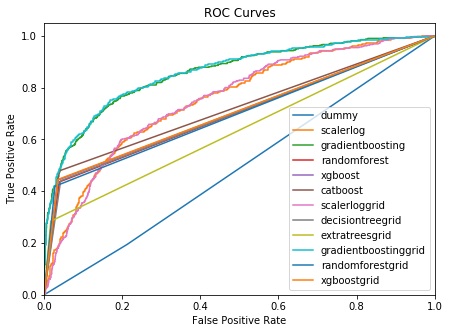

In [113]:

names = ['dummy', 'scalerlog', 'gradientboosting', 'randomforest', 'xgboost', 'catboost', 'scalerloggrid', 'decisiontreegrid', 'extratreesgrid', 'gradientboostinggrid', 'randomforestgrid', 'xgboostgrid']
clfs = [dummy, logpipe0, gdboost, forest, xgb, catboost, loggridsearchra.best_estimator_, dtreesearchra.best_estimator_, extreessearchra.best_estimator_, gdboostsearchra.best_estimator_, forestsearchra.best_estimator_, xgbsearchra.best_estimator_]
colors = cycle(['grey', 'red', 'orange', 'yellow', 'gold', 'lawngreen', 'lightseagreen', 'royalblue', 'aqua', 'blueviolet', 'pink', 'purple'])

rocaucs = {}
accuracy = {}
fprs = {}
tprs = {}

_ = plt.figure(figsize=(7, 5))
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curves')

for name, clf in zip(names, clfs):
    clf.fit(x, y)
    if hasattr(clf, 'decision_function'):
        yscore = clf.decision_function(xtest)    
    else:
        yscore = clf.predict(xtest)
    
    ypredict = clf.predict(xtest)
    accuracy[name] = accuracy_score(ytest, ypredict)
    
    rocauc = roc_auc_score(ytest, yscore)
    rocaucs[name] = rocauc
    
    fpr, tpr, ths = roc_curve(ytest, yscore)
    fprs[name] = list(fpr)
    tprs[name] = list(tpr)
    _ = plt.plot(fpr, tpr, label=name)
    _ = plt.xlim([0.0, 1.0])
    _ = plt.ylim([0.0, 1.05])
    _ = plt.legend(loc='best')

    

In [ ]:

##previous
#scaler & chi2 & logreg

#logreg without scale and chi2
logreg = LogisticRegression(solver='liblinear', random_state=10)
print(cross_val_score(logreg, x, y, cv=5, scoring=make_scorer(accuracy_score)))
#[0.7875   0.788125 0.7925   0.790625 0.795   ]


#logreg with scaler
def scaledlogreg(x, y, k):
    scaler = StandardScaler()
    kf = KFold(n_splits=k, random_state=10)
    
    for trainindex, testindex in kf.split(x):
        trainx = x.iloc[trainindex]
        trainy = y.iloc[trainindex]
        testx = x.iloc[testindex]
        testy = y.iloc[testindex]
        
        trainxs = scaler.fit_transform(trainx)        
        logreg.fit(trainxs, trainy)
        
        testxs = scaler.fit_transform(testx)
        testyp = logreg.predict(testxs)
        
        return accuracy_score(testy, testyp)
    
scaledlogreg(x, y, k=5)
#0.805


#logreg with chi2
def chi2logreg(x, y, k, n):
    selectchi2 = SelectKBest(chi2, n)
    kf = KFold(n_splits=k, random_state=10)
    
    for trainindex, testindex in kf.split(x):
        trainx = x.iloc[trainindex]
        trainy = y.iloc[trainindex]
        testx = x.iloc[testindex]
        testy = y.iloc[testindex]
        
        trainxc = selectchi2.fit_transform(trainx, trainy)
        logreg.fit(trainxc, trainy)
        
        testxc = selectchi2.transform(testx)
        testyp = logreg.predict(testxc)
        
        return accuracy_score(testy, testyp)
        
chi2logreg(x, y, k=5, n=5)
#0.7975

ns = range(1, 14)
score = []
for n in ns:
    score.append(chi2logreg(x, y, k=5, n=n))

score
#[0.79875,0.79875,0.79875,0.79875,0.7975,0.7975,0.7975,0.7975,0.7975,0.7975,0.7975,0.788125,0.788125]
#n doesn't seem to affect score much


#logreg with both chi2 and scaler
def chi2scaledlogreg(x, y, k, n):
    selectchi2 = SelectKBest(chi2, n)
    scaler = StandardScaler()
    kf = KFold(n_splits=k, random_state=10)
    
    for trainindex, testindex in kf.split(x):
        trainx = x.iloc[trainindex]
        trainy = y.iloc[trainindex]
        testx = x.iloc[testindex]
        testy = y.iloc[testindex]
        
        trainxc = selectchi2.fit_transform(trainx, trainy)
        trainxcs = scaler.fit_transform(trainxc)
        logreg.fit(trainxcs, trainy)
        
        testxc = selectchi2.transform(testx)
        testxcs = scaler.fit_transform(testxc)
        testyp = logreg.predict(testxcs)
        
        return accuracy_score(testy, testyp)
    
chi2scaledlogreg(x, y, k=5, n=5)
#0.789375    

ns = range(1, 14)
score = []
for n in ns:
    score.append(chi2scaledlogreg(x, y, k=5, n=n))
    
score
#[0.79875,0.79875,0.77875,0.78875,0.789375,0.811875,0.801875,0.8025,0.8025,0.8025,0.806875,0.805,0.805]

#logreg with scaler seems to be a better option in default settings

#hyper param for logreg with scaler
logparams = {'l1_ratio':[0, 0.1, 0.3, 0.5, 0.7, 0.9, 1], 'intercept_scaling':[0.01, 0.1, 1, 5, 10], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(solver='saga', penalty='elasticnet', random_state=10)
logsearch = GridSearchCV(logreg, param_grid=logparams, scoring=make_scorer(accuracy_score))
scaler = StandardScaler()
kf = KFold(n_splits=5, random_state=10)

#for training in kfold
for trainindex, testindex in kf.split(x):
        trainx = x.iloc[trainindex]
        trainy = y.iloc[trainindex]
        testx = x.iloc[testindex]
        testy = y.iloc[testindex]        
        trainxs = scaler.fit_transform(trainx)
        testxs = scaler.fit_transform(testx)

logsearch.fit(trainxs, trainy)
logsearch.best_estimator_
#C=0.01, intercept_scaling=0.01, l1_ratio=0.1
testyp = logsearch.predict(testxs)
accuracy_score(testy, testyp)
#0.82125

#decision tree
dtree = DecisionTreeClassifier(random_state=10)
dtreeparams = {'max_depth':[5, 6, 7, 8, 9, 10, 11], 'max_features':[5, 7, 8, 9, 10, 11] }
dtreesearch = GridSearchCV(dtree, param_grid=dtreeparams, scoring=make_scorer(accuracy_score))

#for training in kfold
for trainindex, testindex in kf.split(x):
        trainx = x.iloc[trainindex]
        trainy = y.iloc[trainindex]
        testx = x.iloc[testindex]
        testy = y.iloc[testindex]        
        
dtreesearch.fit(trainx, trainy)
dtreesearch.best_estimator_
#max_depth=7, max_features=9

#extra tree
extree = ExtraTreeClassifier(random_state=10)
extreeparams = {'max_depth':[5, 6, 7, 8, 9, 10, 11]}
extreesearch = GridSearchCV(extree, param_grid=extreeparams, scoring=make_scorer(accuracy_score))

#for training in kfold
for trainindex, testindex in kf.split(x):
        trainx = x.iloc[trainindex]
        trainy = y.iloc[trainindex]
        testx = x.iloc[testindex]
        testy = y.iloc[testindex]        
        
extreesearch.fit(trainx, trainy)
extreesearch.best_estimator_
#max_depth=9

cross_val_score(extreesearch, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.8525  , 0.860625, 0.8575  , 0.87125 , 0.84875 ])

#extra trees
extrees = ExtraTreesClassifier(random_state=10)
extreesparams = {'n_estimators':[5, 8, 9, 10, 11, 12, 15, 18, 19, 20], 'max_depth':[8, 9, 10, 11, 12, 13, 14, 15, 16]}
extreessearch = GridSearchCV(extrees, param_grid=extreesparams, scoring=make_scorer(accuracy_score))

#for training in kfold
for trainindex, testindex in kf.split(x):
        trainx = x.iloc[trainindex]
        trainy = y.iloc[trainindex]
        testx = x.iloc[testindex]
        testy = y.iloc[testindex]        
        
extreessearch.fit(trainx, trainy)
extreessearch.best_estimator_
#max_depth=13, n_estimators=18

#gradient boosting
gdboost = GradientBoostingClassifier(random_state=10)
gdboostparams = {'loss': ['deviance', 'exponential'], 'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5], 'n_estimators':[10, 100, 300, 500, 800, 1200], 'max_depth':[1, 5, 8, 15, 25, 30], 'max_features': ['log2', 'sqrt'], 'min_samples_split':[1, 2 ,5 ,10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
gdboostsearch = GridSearchCV(gdboost, param_grid=gdboostparams, scoring=make_scorer(accuracy_score))

#for training in kfold
for trainindex, testindex in kf.split(x):
        trainx = x.iloc[trainindex]
        trainy = y.iloc[trainindex]
        testx = x.iloc[testindex]
        testy = y.iloc[testindex]        
        
gdboostsearch.fit(trainx, trainy)
gdboostsearch.best_estimator_
#learning_rate=0.3, max_depth=3, n_estimators=15

cross_val_score(gdboostsearch, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.8575  , 0.864375, 0.8625  , 0.86375 , 0.864375])

##random forest
forestparams = {'n_estimators':[5, 10, 20, 30, 50, 100, 300, 500, 800], 'max_depth':[5, 8, 15, 25, 30], 'max_features':['log2', 'sqrt', 'none'], 'min_samples_split':[1, 2, 5, 10, 15, 100], 'min_samples_leaf':[1, 2, 5, 10]}
forest = RandomForestClassifier(random_state=10)
forestsearch = GridSearchCV(forest, param_grid=forestparams, scoring=make_scorer(accuracy_score))

kf = KFold(n_splits=5, random_state=10)

#for training in kfold
for trainindex, testindex in kf.split(x):
        trainx = x.iloc[trainindex]
        trainy = y.iloc[trainindex]
        testx = x.iloc[testindex]
        testy = y.iloc[testindex]        

forestsearch.fit(trainx, trainy)
forestsearch.best_estimator_
#max_depth=8, max_features=7, n_estimators=18

testyp = forestsearch.predict(testx)
accuracy_score(testy, testyp)
#0.86875

cross_val_score(forestsearch, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.858125, 0.869375, 0.863125, 0.863125, 0.86125 ])

#svc
svc = SVC(random_state=10)
svcparams = {'C':[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05], 'gamma':['auto', 'scale']}
svcsearch = GridSearchCV(svc, param_grid=svcparams, scoring=make_scorer(accuracy_score))

#for training in kfold
for trainindex, testindex in kf.split(x):
        trainx = x.iloc[trainindex]
        trainy = y.iloc[trainindex]
        testx = x.iloc[testindex]
        testy = y.iloc[testindex]        

svcsearch.fit(trainx, trainy)
svcsearch.best_estimator_
#C=1e-10, gamma='auto

testyp = svcsearch.predict(testx)
accuracy_score(testy, testyp)
#0.81125


cross_val_score(svcsearch, x, y, cv=5, scoring=make_scorer(accuracy_score))
#array([0.798125, 0.798125, 0.798125, 0.798125, 0.798125])

#params
#catboostparams = {'learning_rate':[0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08], 'n_estimators':[30, 40, 50, 60, 70, 80], 'max_depth':[7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'boosting_type':['Ordered', 'Plain'], 'l2_leaf_reg':[0.5, 1, 2, 3]}
catboostparams = {'learning_rate':[0.02, 0.04, 0.05, 0.06, 0.08], 'n_estimators':[30, 50, 80], 'max_depth':[7, 10, 13, 15, 16], 'boosting_type':['Ordered', 'Plain'], 'l2_leaf_reg':[0.5, 1, 3]}
catboost.grid_search(param_grid=catboostparams, X=trainx, y=trainy)
#'params': {'depth': 9,'iterations': 40,'learning_rate': 0.04,'boosting_type': 'Plain'}
#'params': {'depth': 13,'l2_leaf_reg': 1,'iterations': 60,'learning_rate': 0.05,'boosting_type': 'Ordered'}



